INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
Number of devices: 1
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localh

2024-03-18 21:51:26.990463: W tensorflow/core/grappler/optimizers/data/auto_shard.cc:766] AUTO sharding policy will apply DATA sharding policy as it failed to apply FILE sharding policy because of the following reason: Did not find a shardable source, walked to a node which is not a dataset: name: "FlatMapDataset/_2"
op: "FlatMapDataset"
input: "TensorDataset/_1"
attr {
  key: "Targuments"
  value {
    list {
    }
  }
}
attr {
  key: "_cardinality"
  value {
    i: -2
  }
}
attr {
  key: "f"
  value {
    func {
      name: "__inference_Dataset_flat_map_flat_map_fn_909311"
    }
  }
}
attr {
  key: "metadata"
  value {
    s: "\n\023FlatMapDataset:1727"
  }
}
attr {
  key: "output_shapes"
  value {
    list {
      shape {
        dim {
          size: -1
        }
        dim {
          size: -1
        }
        dim {
          size: -1
        }
        dim {
          size: -1
        }
      }
      shape {
        dim {
          size: -1
        }
        dim {
          size

Epoch 1/50
430/430 [==============================] - ETA: 0s - loss: 0.0169

2024-03-18 21:52:03.101741: W tensorflow/core/grappler/optimizers/data/auto_shard.cc:766] AUTO sharding policy will apply DATA sharding policy as it failed to apply FILE sharding policy because of the following reason: Did not find a shardable source, walked to a node which is not a dataset: name: "FlatMapDataset/_9"
op: "FlatMapDataset"
input: "PrefetchDataset/_8"
attr {
  key: "Targuments"
  value {
    list {
    }
  }
}
attr {
  key: "_cardinality"
  value {
    i: -2
  }
}
attr {
  key: "f"
  value {
    func {
      name: "__inference_Dataset_flat_map_slice_batch_indices_913905"
    }
  }
}
attr {
  key: "metadata"
  value {
    s: "\n\023FlatMapDataset:1750"
  }
}
attr {
  key: "output_shapes"
  value {
    list {
      shape {
        dim {
          size: -1
        }
      }
    }
  }
}
attr {
  key: "output_types"
  value {
    list {
      type: DT_INT64
    }
  }
}
. Consider either turning off auto-sharding or switching the auto_shard_policy to DATA to shard this dataset.

430/430 [==============================] - 38s 82ms/step - loss: 0.0169 - val_loss: 0.0112
Epoch 2/50
430/430 [==============================] - 33s 77ms/step - loss: 0.0105 - val_loss: 0.0099
Epoch 3/50
430/430 [==============================] - 33s 78ms/step - loss: 0.0092 - val_loss: 0.0098
Epoch 4/50
430/430 [==============================] - 33s 77ms/step - loss: 0.0088 - val_loss: 0.0178
Epoch 5/50
430/430 [==============================] - 33s 77ms/step - loss: 0.0083 - val_loss: 0.0086
Epoch 6/50
430/430 [==============================] - 34s 78ms/step - loss: 0.0081 - val_loss: 0.0083
Epoch 7/50
430/430 [==============================] - 33s 77ms/step - loss: 0.0081 - val_loss: 0.0083
Epoch 8/50
430/430 [==============================] - 33s 78ms/step - loss: 0.0080 - val_loss: 0.0082
Epoch 9/50
430/430 [==============================] - 34s 78ms/step - loss: 0.0079 - val_loss: 0.0082
Epoch 10/50
430/430 [==============================] - 33s 78ms/step - loss: 0.0079 - val_los

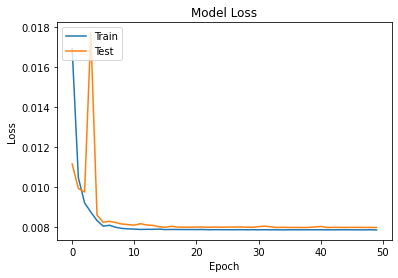

In [40]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Conv2DTranspose, Reshape, BatchNormalization, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.measure import label, regionprops
from datetime import datetime
import cv2

# Function to preprocess images
def preprocess_images(he_image, binary_mask, output_size=(128, 128)):
    binary_mask = binary_mask > 0  # Ensure mask is boolean
    labeled_mask = label(binary_mask)
    regions = regionprops(labeled_mask)
    rois = []
    for region in regions:
        minr, minc, maxr, maxc = region.bbox
        cropped_image = he_image[minr:maxr, minc:maxc]
        resized_image = cv2.resize(cropped_image, output_size, interpolation=cv2.INTER_CUBIC)
        rois.append(resized_image)
    return np.array(rois).astype('float32') / 255.0

# Load the images (placeholders for actual paths)
binary_mask = imread('/home/j.maragall/Pipeline_CellMapping/R2_HE_modified_binary_mask.tiff') > 0
he_image = imread("/home/j.maragall/j.maragall/Replication2 _DAPImapping/transformed_image.tif")

# Preprocess and normalize images
rois_normalized = preprocess_images(he_image, binary_mask)

# Split the data
X_train, X_test = train_test_split(rois_normalized, test_size=0.2, random_state=42)

# Define distributed strategy
strategy = tf.distribute.MirroredStrategy()
print('Number of devices: {}'.format(strategy.num_replicas_in_sync))

with strategy.scope():
    # Model architecture
    input_shape = (128, 128, 3)
    inputs = Input(shape=input_shape)
    x = Conv2D(32, kernel_size=3, activation='relu', padding='same')(inputs)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Conv2D(64, kernel_size=3, activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Conv2D(128, kernel_size=3, activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Flatten()(x)
    x = Dense(128, activation='relu', name='bottleneck')(x)
    x = Dropout(0.5)(x)
    x = Dense(16 * 16 * 128, activation='relu')(x)
    x = Reshape((16, 16, 128))(x)
    x = Conv2DTranspose(128, kernel_size=3, strides=(2, 2), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = Conv2DTranspose(64, kernel_size=3, strides=(2, 2), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = Conv2DTranspose(32, kernel_size=3, strides=(2, 2), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    outputs = Conv2D(3, kernel_size=3, activation='sigmoid', padding='same')(x)
    autoencoder_model = Model(inputs=inputs, outputs=outputs)

    # Compile the model
    lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
        initial_learning_rate=1e-4,
        decay_steps=10000,
        decay_rate=0.9
    )
    autoencoder_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule), loss='mse')

# Model Summary
autoencoder_model.summary()

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Apply the data augmentation to the training data
datagen.fit(X_train)

# Callbacks
log_dir = "logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Training the model with Data Augmentation and callbacks
history = autoencoder_model.fit(
    datagen.flow(X_train, X_train, batch_size=32),
    steps_per_epoch=len(X_train) // 32,
    epochs=50,
    validation_data=(X_test, X_test),
    callbacks=[tensorboard_callback, early_stopping]
)

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


Number of ROIs: 17209


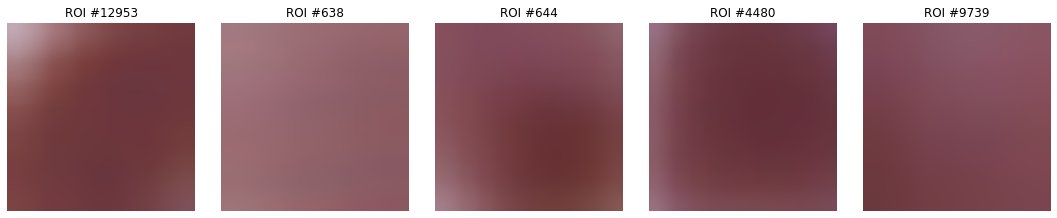

In [15]:
import numpy as np
import cv2
from skimage.io import imread
from skimage.measure import label, regionprops
import matplotlib.pyplot as plt
import random
from PIL import Image

# Load the images (placeholders for actual paths)
binary_mask = imread('/home/j.maragall/Pipeline_CellMapping/R2_HE_modified_binary_mask.tiff') > 0
he_image = imread("/home/j.maragall/j.maragall/Replication2 _DAPImapping/transformed_image.tif")

def preprocess_images(he_image, binary_mask, output_size=(128, 128)):
    # Ensure binary_mask is boolean, then label
    binary_mask = binary_mask > 0  # In case it's not already boolean
    labeled_mask = label(binary_mask)
    regions = regionprops(labeled_mask)
    rois = []

    for region in regions:
        # Get the bounding box of the region
        minr, minc, maxr, maxc = region.bbox
        # Crop the region from the original image
        cropped_image = he_image[minr:maxr, minc:maxc]
        # Resize the cropped image if needed
        resized_image = cv2.resize(cropped_image, output_size, interpolation=cv2.INTER_CUBIC)
        rois.append(resized_image)

    return rois

# Process images
rois = preprocess_images(he_image, binary_mask)

# Verify the number of ROIs
print(f"Number of ROIs: {len(rois)}")

# Now, let's visualize a set of random ROIs
num_to_display = 5
selected_indices = np.random.choice(range(len(rois)), num_to_display, replace=False)
plt.figure(figsize=(15, 3))

# Display random ROIs
for i, idx in enumerate(selected_indices):
    plt.subplot(1, num_to_display, i + 1)
    plt.imshow(rois[idx], cmap='gray')  # Assuming the images are grayscale
    plt.title(f'ROI #{idx + 1}')
    plt.axis('off')  # Hide the axis ticks and labels

plt.tight_layout()
plt.show()


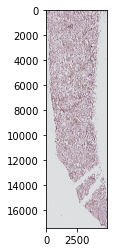

In [49]:
plt.imshow(he_image)

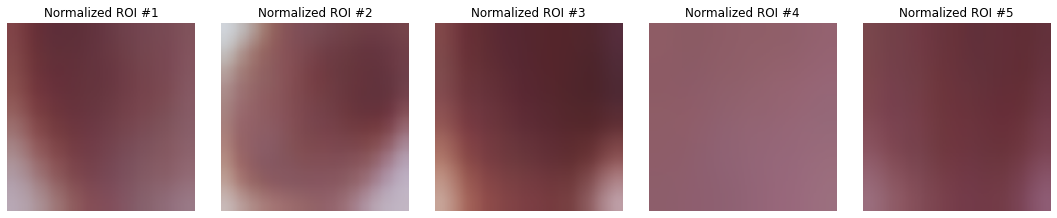

Min pixel value in the first ROI: 0.18039216101169586
Max pixel value in the first ROI: 0.7215686440467834


In [27]:
# Convert and normalize pixel values to [0, 1] for each ROI
rois_normalized = [(roi / 255.0).astype('float32') for roi in rois]

# Show the first few normalized ROIs
num_to_display = 5
plt.figure(figsize=(15, 3))

for i in range(num_to_display):
    plt.subplot(1, num_to_display, i + 1)
    plt.imshow(rois_normalized[i])  # Display the normalized image
    plt.title(f'Normalized ROI #{i + 1}')
    plt.axis('off')  # Hide the axis ticks and labels

plt.tight_layout()
plt.show()

# Print out the min and max values of the first ROI to verify normalization
print(f'Min pixel value in the first ROI: {rois_normalized[0].min()}')
print(f'Max pixel value in the first ROI: {rois_normalized[0].max()}')


In [28]:
from sklearn.model_selection import train_test_split

# Use the preprocess_images function defined earlier to get your ROIs
rois_normalized = preprocess_images(he_image, binary_mask)

# Convert the list of ROIs to a numpy array
rois_np = np.array(rois_normalized)

# Normalize your data to have values between 0 and 1
rois_np = rois_np.astype('float32') / 255.0

# Since there's no direct y labels for unsupervised learning, you're using the images themselves as targets.
# However, if you're splitting for a supervised task, ensure you have your labels array ready.
X_train, X_test = train_test_split(rois_np, test_size=0.2, random_state=42)


# Assuming X_train and X_test are ready
#autoencoder.fit(X_train, X_train, epochs=10, batch_size=32, validation_data=(X_test, X_test))


In [32]:
# Assuming X_train is your input data and X_train itself is what you're trying to predict,
# similar to an autoencoder setup. Adjust accordingly.
history = autoencoder_model.fit(X_train, X_train,
                                epochs=50,
                                batch_size=32,
                                validation_data=(X_test, X_test))


Epoch 1/50
431/431 [==============================] - 8s 18ms/step - loss: 2.8267e-05 - val_loss: 3.4820e-05
Epoch 2/50
431/431 [==============================] - 7s 16ms/step - loss: 2.7171e-05 - val_loss: 3.4153e-05
Epoch 3/50
431/431 [==============================] - 7s 15ms/step - loss: 2.6072e-05 - val_loss: 9.3967e-05
Epoch 4/50
431/431 [==============================] - 7s 15ms/step - loss: 3.2470e-05 - val_loss: 5.1526e-05
Epoch 5/50
431/431 [==============================] - 7s 16ms/step - loss: 2.8972e-05 - val_loss: 1.3881e-04
Epoch 6/50
431/431 [==============================] - 7s 16ms/step - loss: 2.6285e-05 - val_loss: 4.1858e-05
Epoch 7/50
431/431 [==============================] - 7s 16ms/step - loss: 2.7247e-05 - val_loss: 4.2917e-05
Epoch 8/50
431/431 [==============================] - 7s 15ms/step - loss: 2.6439e-05 - val_loss: 4.3254e-05
Epoch 9/50
431/431 [==============================] - 7s 16ms/step - loss: 3.2410e-05 - val_loss: 5.0492e-05
Epoch 10/50
431/431

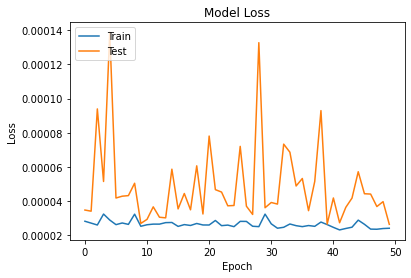

In [33]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [41]:
from tensorflow.keras.models import load_model

# Define the encoder model to extract features
encoder_model = Model(inputs=autoencoder_model.input, outputs=autoencoder_model.get_layer('bottleneck').output)

# Extract features
features = encoder_model.predict(X_train)


In [42]:
import pandas as pd

# Convert extracted features into a DataFrame
df_features = pd.DataFrame(features, columns=[f'Feature_{i+1}' for i in range(features.shape[1])])

In [47]:
# Save the DataFrame to a CSV file
df_features.to_csv('ae_extracted_features.csv', index=False)

/home/j.maragall/.local/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


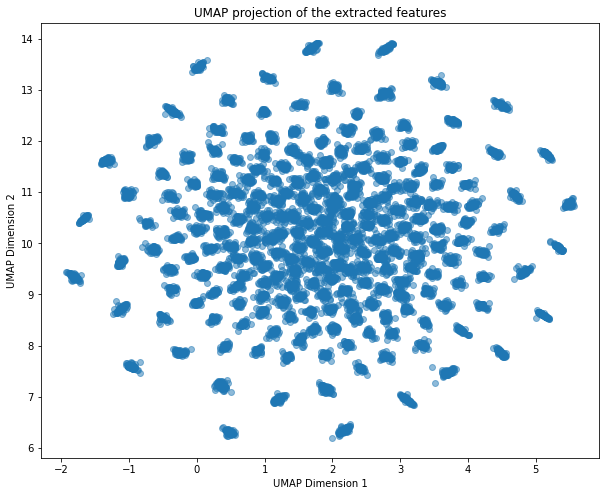

In [48]:

from umap import UMAP
import matplotlib.pyplot as plt

# Initialize and fit UMAP
umap_model = UMAP(n_neighbors=100, min_dist=0, n_components=2, random_state=82, metric="canberra")
umap_embedding = umap_model.fit_transform(df_features)

# Plot UMAP embeddings
plt.figure(figsize=(10, 8))
plt.scatter(umap_embedding[:, 0], umap_embedding[:, 1], alpha=0.5)
plt.title('UMAP projection of the extracted features')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.show()



In [50]:
from sklearn.model_selection import KFold

# Parameters
k = 5  # Number of folds
num_epochs = 50
batch_size = 32

# Prepare the cross-validation
kf = KFold(n_splits=k, shuffle=True, random_state=42)

fold_counter = 1
validation_scores = []

for train_index, val_index in kf.split(rois_normalized):
    # Split data
    X_train_fold, X_val_fold = rois_normalized[train_index], rois_normalized[val_index]
    
    # Data Augmentation
    datagen = ImageDataGenerator(
        rotation_range=10,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True,
        fill_mode='nearest'
    )
    datagen.fit(X_train_fold)
    
    # Redefine the model for a fresh start
    with strategy.scope():
        # Model architecture (replace the following lines with your actual model architecture)
        inputs = Input(shape=(128, 128, 3))
         # Model architecture
            
        input_shape = (128, 128, 3)
        inputs = Input(shape=input_shape)
        x = Conv2D(32, kernel_size=3, activation='relu', padding='same')(inputs)
        x = BatchNormalization()(x)
        x = MaxPooling2D(pool_size=(2, 2))(x)
        x = Conv2D(64, kernel_size=3, activation='relu', padding='same')(x)
        x = BatchNormalization()(x)
        x = MaxPooling2D(pool_size=(2, 2))(x)
        x = Conv2D(128, kernel_size=3, activation='relu', padding='same')(x)
        x = BatchNormalization()(x)
        x = MaxPooling2D(pool_size=(2, 2))(x)
        x = Flatten()(x)
        x = Dense(128, activation='relu', name='bottleneck')(x)
        x = Dropout(0.5)(x)
        x = Dense(16 * 16 * 128, activation='relu')(x)
        x = Reshape((16, 16, 128))(x)
        x = Conv2DTranspose(128, kernel_size=3, strides=(2, 2), padding='same', activation='relu')(x)
        x = BatchNormalization()(x)
        x = Conv2DTranspose(64, kernel_size=3, strides=(2, 2), padding='same', activation='relu')(x)
        x = BatchNormalization()(x)
        x = Conv2DTranspose(32, kernel_size=3, strides=(2, 2), padding='same', activation='relu')(x)
        x = BatchNormalization()(x)
        outputs = Conv2D(3, kernel_size=3, activation='sigmoid', padding='same')(x)
    
        autoencoder_model = Model(inputs=inputs, outputs=outputs)
        
        # Compile the model with a learning rate schedule
        lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
            initial_learning_rate=1e-4,
            decay_steps=10000,
            decay_rate=0.9
        )
        autoencoder_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule), loss='mse')

    # Callbacks
    log_dir = "logs/cv_fold_" + str(fold_counter) + "_" + datetime.now().strftime("%Y%m%d-%H%M%S")
    tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    
    # Train the model with the current fold data
    history = autoencoder_model.fit(
        datagen.flow(X_train_fold, X_train_fold, batch_size=batch_size),
        steps_per_epoch=len(X_train_fold) // batch_size,
        epochs=num_epochs,
        validation_data=(X_val_fold, X_val_fold),
        callbacks=[tensorboard_callback, early_stopping]
    )

    # Record the validation loss
    validation_scores.append(history.history['val_loss'][-1])

    # Increment fold counter
    fold_counter += 1

# Output the validation scores for each fold
for i, score in enumerate(validation_scores, 1):
    print(f"Validation score for fold {i}: {score}")

# Calculate and print the average validation score across all folds
average_validation_score = sum(validation_scores) / len(validation_scores)
print(f"Average Validation Score: {average_validation_score}")


2024-03-18 22:47:38.778154: W tensorflow/core/grappler/optimizers/data/auto_shard.cc:766] AUTO sharding policy will apply DATA sharding policy as it failed to apply FILE sharding policy because of the following reason: Did not find a shardable source, walked to a node which is not a dataset: name: "FlatMapDataset/_2"
op: "FlatMapDataset"
input: "TensorDataset/_1"
attr {
  key: "Targuments"
  value {
    list {
    }
  }
}
attr {
  key: "_cardinality"
  value {
    i: -2
  }
}
attr {
  key: "f"
  value {
    func {
      name: "__inference_Dataset_flat_map_flat_map_fn_1275391"
    }
  }
}
attr {
  key: "metadata"
  value {
    s: "\n\023FlatMapDataset:2420"
  }
}
attr {
  key: "output_shapes"
  value {
    list {
      shape {
        dim {
          size: -1
        }
        dim {
          size: -1
        }
        dim {
          size: -1
        }
        dim {
          size: -1
        }
      }
      shape {
        dim {
          size: -1
        }
        dim {
          siz

Epoch 1/50
430/430 [==============================] - ETA: 0s - loss: 0.0191

2024-03-18 22:48:14.951449: W tensorflow/core/grappler/optimizers/data/auto_shard.cc:766] AUTO sharding policy will apply DATA sharding policy as it failed to apply FILE sharding policy because of the following reason: Did not find a shardable source, walked to a node which is not a dataset: name: "FlatMapDataset/_9"
op: "FlatMapDataset"
input: "PrefetchDataset/_8"
attr {
  key: "Targuments"
  value {
    list {
    }
  }
}
attr {
  key: "_cardinality"
  value {
    i: -2
  }
}
attr {
  key: "f"
  value {
    func {
      name: "__inference_Dataset_flat_map_slice_batch_indices_1279983"
    }
  }
}
attr {
  key: "metadata"
  value {
    s: "\n\023FlatMapDataset:2443"
  }
}
attr {
  key: "output_shapes"
  value {
    list {
      shape {
        dim {
          size: -1
        }
      }
    }
  }
}
attr {
  key: "output_types"
  value {
    list {
      type: DT_INT64
    }
  }
}
. Consider either turning off auto-sharding or switching the auto_shard_policy to DATA to shard this dataset

430/430 [==============================] - 38s 82ms/step - loss: 0.0191 - val_loss: 0.0158
Epoch 2/50
430/430 [==============================] - 33s 77ms/step - loss: 0.0079 - val_loss: 0.0115
Epoch 3/50
430/430 [==============================] - 34s 78ms/step - loss: 0.0075 - val_loss: 0.0080
Epoch 4/50
430/430 [==============================] - 33s 77ms/step - loss: 0.0074 - val_loss: 0.0075
Epoch 5/50
430/430 [==============================] - 33s 78ms/step - loss: 0.0074 - val_loss: 0.0076
Epoch 6/50
430/430 [==============================] - 33s 77ms/step - loss: 0.0075 - val_loss: 0.0118
Epoch 7/50
430/430 [==============================] - 34s 78ms/step - loss: 0.0074 - val_loss: 0.0075
Epoch 8/50
430/430 [==============================] - 33s 78ms/step - loss: 0.0074 - val_loss: 0.0076
Epoch 9/50
430/430 [==============================] - 33s 77ms/step - loss: 0.0074 - val_loss: 0.0075
Epoch 10/50
430/430 [==============================] - 33s 77ms/step - loss: 0.0074 - val_los

2024-03-18 23:15:35.524065: W tensorflow/core/grappler/optimizers/data/auto_shard.cc:766] AUTO sharding policy will apply DATA sharding policy as it failed to apply FILE sharding policy because of the following reason: Did not find a shardable source, walked to a node which is not a dataset: name: "FlatMapDataset/_2"
op: "FlatMapDataset"
input: "TensorDataset/_1"
attr {
  key: "Targuments"
  value {
    list {
    }
  }
}
attr {
  key: "_cardinality"
  value {
    i: -2
  }
}
attr {
  key: "f"
  value {
    func {
      name: "__inference_Dataset_flat_map_flat_map_fn_1638801"
    }
  }
}
attr {
  key: "metadata"
  value {
    s: "\n\023FlatMapDataset:3100"
  }
}
attr {
  key: "output_shapes"
  value {
    list {
      shape {
        dim {
          size: -1
        }
        dim {
          size: -1
        }
        dim {
          size: -1
        }
        dim {
          size: -1
        }
      }
      shape {
        dim {
          size: -1
        }
        dim {
          siz

Epoch 1/50
430/430 [==============================] - ETA: 0s - loss: 0.0178

2024-03-18 23:16:10.916098: W tensorflow/core/grappler/optimizers/data/auto_shard.cc:766] AUTO sharding policy will apply DATA sharding policy as it failed to apply FILE sharding policy because of the following reason: Did not find a shardable source, walked to a node which is not a dataset: name: "FlatMapDataset/_9"
op: "FlatMapDataset"
input: "PrefetchDataset/_8"
attr {
  key: "Targuments"
  value {
    list {
    }
  }
}
attr {
  key: "_cardinality"
  value {
    i: -2
  }
}
attr {
  key: "f"
  value {
    func {
      name: "__inference_Dataset_flat_map_slice_batch_indices_1643393"
    }
  }
}
attr {
  key: "metadata"
  value {
    s: "\n\023FlatMapDataset:3123"
  }
}
attr {
  key: "output_shapes"
  value {
    list {
      shape {
        dim {
          size: -1
        }
      }
    }
  }
}
attr {
  key: "output_types"
  value {
    list {
      type: DT_INT64
    }
  }
}
. Consider either turning off auto-sharding or switching the auto_shard_policy to DATA to shard this dataset

430/430 [==============================] - 38s 83ms/step - loss: 0.0178 - val_loss: 0.0105
Epoch 2/50
430/430 [==============================] - 34s 78ms/step - loss: 0.0104 - val_loss: 0.0082
Epoch 3/50
430/430 [==============================] - 33s 78ms/step - loss: 0.0093 - val_loss: 0.0080
Epoch 4/50
430/430 [==============================] - 33s 78ms/step - loss: 0.0082 - val_loss: 0.0081
Epoch 5/50
430/430 [==============================] - 33s 77ms/step - loss: 0.0082 - val_loss: 0.0097
Epoch 6/50
430/430 [==============================] - 33s 77ms/step - loss: 0.0082 - val_loss: 0.0078
Epoch 7/50
430/430 [==============================] - 33s 77ms/step - loss: 0.0081 - val_loss: 0.0081
Epoch 8/50
430/430 [==============================] - 33s 78ms/step - loss: 0.0081 - val_loss: 0.0079
Epoch 9/50
430/430 [==============================] - 34s 78ms/step - loss: 0.0081 - val_loss: 0.0078
Epoch 10/50
430/430 [==============================] - 33s 77ms/step - loss: 0.0081 - val_los

2024-03-18 23:34:37.929421: W tensorflow/core/grappler/optimizers/data/auto_shard.cc:766] AUTO sharding policy will apply DATA sharding policy as it failed to apply FILE sharding policy because of the following reason: Did not find a shardable source, walked to a node which is not a dataset: name: "FlatMapDataset/_2"
op: "FlatMapDataset"
input: "TensorDataset/_1"
attr {
  key: "Targuments"
  value {
    list {
    }
  }
}
attr {
  key: "_cardinality"
  value {
    i: -2
  }
}
attr {
  key: "f"
  value {
    func {
      name: "__inference_Dataset_flat_map_flat_map_fn_1887897"
    }
  }
}
attr {
  key: "metadata"
  value {
    s: "\n\023FlatMapDataset:3572"
  }
}
attr {
  key: "output_shapes"
  value {
    list {
      shape {
        dim {
          size: -1
        }
        dim {
          size: -1
        }
        dim {
          size: -1
        }
        dim {
          size: -1
        }
      }
      shape {
        dim {
          size: -1
        }
        dim {
          siz

Epoch 1/50
430/430 [==============================] - ETA: 0s - loss: 0.0201

2024-03-18 23:35:13.902349: W tensorflow/core/grappler/optimizers/data/auto_shard.cc:766] AUTO sharding policy will apply DATA sharding policy as it failed to apply FILE sharding policy because of the following reason: Did not find a shardable source, walked to a node which is not a dataset: name: "FlatMapDataset/_9"
op: "FlatMapDataset"
input: "PrefetchDataset/_8"
attr {
  key: "Targuments"
  value {
    list {
    }
  }
}
attr {
  key: "_cardinality"
  value {
    i: -2
  }
}
attr {
  key: "f"
  value {
    func {
      name: "__inference_Dataset_flat_map_slice_batch_indices_1892489"
    }
  }
}
attr {
  key: "metadata"
  value {
    s: "\n\023FlatMapDataset:3595"
  }
}
attr {
  key: "output_shapes"
  value {
    list {
      shape {
        dim {
          size: -1
        }
      }
    }
  }
}
attr {
  key: "output_types"
  value {
    list {
      type: DT_INT64
    }
  }
}
. Consider either turning off auto-sharding or switching the auto_shard_policy to DATA to shard this dataset

430/430 [==============================] - 38s 84ms/step - loss: 0.0201 - val_loss: 0.0107
Epoch 2/50
430/430 [==============================] - 33s 78ms/step - loss: 0.0097 - val_loss: 0.0084
Epoch 3/50
430/430 [==============================] - 34s 78ms/step - loss: 0.0079 - val_loss: 0.0062
Epoch 4/50
430/430 [==============================] - 33s 78ms/step - loss: 0.0066 - val_loss: 0.0059
Epoch 5/50
430/430 [==============================] - 33s 77ms/step - loss: 0.0056 - val_loss: 0.0046
Epoch 6/50
430/430 [==============================] - 34s 79ms/step - loss: 0.0051 - val_loss: 0.0045
Epoch 7/50
430/430 [==============================] - 33s 77ms/step - loss: 0.0050 - val_loss: 0.0045
Epoch 8/50
430/430 [==============================] - 33s 78ms/step - loss: 0.0048 - val_loss: 0.0045
Epoch 9/50
430/430 [==============================] - 33s 77ms/step - loss: 0.0048 - val_loss: 0.0041
Epoch 10/50
430/430 [==============================] - 33s 77ms/step - loss: 0.0044 - val_los

2024-03-18 23:46:26.361061: W tensorflow/core/grappler/optimizers/data/auto_shard.cc:766] AUTO sharding policy will apply DATA sharding policy as it failed to apply FILE sharding policy because of the following reason: Did not find a shardable source, walked to a node which is not a dataset: name: "FlatMapDataset/_2"
op: "FlatMapDataset"
input: "TensorDataset/_1"
attr {
  key: "Targuments"
  value {
    list {
    }
  }
}
attr {
  key: "_cardinality"
  value {
    i: -2
  }
}
attr {
  key: "f"
  value {
    func {
      name: "__inference_Dataset_flat_map_flat_map_fn_2043880"
    }
  }
}
attr {
  key: "metadata"
  value {
    s: "\n\023FlatMapDataset:3875"
  }
}
attr {
  key: "output_shapes"
  value {
    list {
      shape {
        dim {
          size: -1
        }
        dim {
          size: -1
        }
        dim {
          size: -1
        }
        dim {
          size: -1
        }
      }
      shape {
        dim {
          size: -1
        }
        dim {
          siz

Epoch 1/50
430/430 [==============================] - ETA: 0s - loss: 0.0190

2024-03-18 23:47:03.254227: W tensorflow/core/grappler/optimizers/data/auto_shard.cc:766] AUTO sharding policy will apply DATA sharding policy as it failed to apply FILE sharding policy because of the following reason: Did not find a shardable source, walked to a node which is not a dataset: name: "FlatMapDataset/_9"
op: "FlatMapDataset"
input: "PrefetchDataset/_8"
attr {
  key: "Targuments"
  value {
    list {
    }
  }
}
attr {
  key: "_cardinality"
  value {
    i: -2
  }
}
attr {
  key: "f"
  value {
    func {
      name: "__inference_Dataset_flat_map_slice_batch_indices_2048472"
    }
  }
}
attr {
  key: "metadata"
  value {
    s: "\n\023FlatMapDataset:3898"
  }
}
attr {
  key: "output_shapes"
  value {
    list {
      shape {
        dim {
          size: -1
        }
      }
    }
  }
}
attr {
  key: "output_types"
  value {
    list {
      type: DT_INT64
    }
  }
}
. Consider either turning off auto-sharding or switching the auto_shard_policy to DATA to shard this dataset

430/430 [==============================] - 39s 84ms/step - loss: 0.0190 - val_loss: 0.0138
Epoch 2/50
430/430 [==============================] - 33s 78ms/step - loss: 0.0076 - val_loss: 0.0085
Epoch 3/50
430/430 [==============================] - 34s 78ms/step - loss: 0.0075 - val_loss: 0.0077
Epoch 4/50
430/430 [==============================] - 33s 77ms/step - loss: 0.0074 - val_loss: 0.0076
Epoch 5/50
430/430 [==============================] - 33s 77ms/step - loss: 0.0074 - val_loss: 0.0076
Epoch 6/50
430/430 [==============================] - 33s 78ms/step - loss: 0.0074 - val_loss: 0.0076
Epoch 7/50
430/430 [==============================] - 33s 77ms/step - loss: 0.0074 - val_loss: 0.0076
Epoch 8/50
430/430 [==============================] - 33s 78ms/step - loss: 0.0074 - val_loss: 0.0076
Epoch 9/50
430/430 [==============================] - 33s 78ms/step - loss: 0.0074 - val_loss: 0.0076
Epoch 10/50
430/430 [==============================] - 33s 78ms/step - loss: 0.0074 - val_los

2024-03-19 00:02:07.875232: W tensorflow/core/grappler/optimizers/data/auto_shard.cc:766] AUTO sharding policy will apply DATA sharding policy as it failed to apply FILE sharding policy because of the following reason: Did not find a shardable source, walked to a node which is not a dataset: name: "FlatMapDataset/_2"
op: "FlatMapDataset"
input: "TensorDataset/_1"
attr {
  key: "Targuments"
  value {
    list {
    }
  }
}
attr {
  key: "_cardinality"
  value {
    i: -2
  }
}
attr {
  key: "f"
  value {
    func {
      name: "__inference_Dataset_flat_map_flat_map_fn_2249920"
    }
  }
}
attr {
  key: "metadata"
  value {
    s: "\n\023FlatMapDataset:4269"
  }
}
attr {
  key: "output_shapes"
  value {
    list {
      shape {
        dim {
          size: -1
        }
        dim {
          size: -1
        }
        dim {
          size: -1
        }
        dim {
          size: -1
        }
      }
      shape {
        dim {
          size: -1
        }
        dim {
          siz

Epoch 1/50
430/430 [==============================] - ETA: 0s - loss: 0.0203

2024-03-19 00:02:43.593593: W tensorflow/core/grappler/optimizers/data/auto_shard.cc:766] AUTO sharding policy will apply DATA sharding policy as it failed to apply FILE sharding policy because of the following reason: Did not find a shardable source, walked to a node which is not a dataset: name: "FlatMapDataset/_9"
op: "FlatMapDataset"
input: "PrefetchDataset/_8"
attr {
  key: "Targuments"
  value {
    list {
    }
  }
}
attr {
  key: "_cardinality"
  value {
    i: -2
  }
}
attr {
  key: "f"
  value {
    func {
      name: "__inference_Dataset_flat_map_slice_batch_indices_2254512"
    }
  }
}
attr {
  key: "metadata"
  value {
    s: "\n\023FlatMapDataset:4292"
  }
}
attr {
  key: "output_shapes"
  value {
    list {
      shape {
        dim {
          size: -1
        }
      }
    }
  }
}
attr {
  key: "output_types"
  value {
    list {
      type: DT_INT64
    }
  }
}
. Consider either turning off auto-sharding or switching the auto_shard_policy to DATA to shard this dataset

430/430 [==============================] - 38s 82ms/step - loss: 0.0203 - val_loss: 0.0105
Epoch 2/50
430/430 [==============================] - 33s 77ms/step - loss: 0.0091 - val_loss: 0.0075
Epoch 3/50
430/430 [==============================] - 33s 78ms/step - loss: 0.0068 - val_loss: 0.0054
Epoch 4/50
430/430 [==============================] - 33s 77ms/step - loss: 0.0046 - val_loss: 0.0035
Epoch 5/50
430/430 [==============================] - 34s 78ms/step - loss: 0.0037 - val_loss: 0.0032
Epoch 6/50
430/430 [==============================] - 33s 77ms/step - loss: 0.0034 - val_loss: 0.0034
Epoch 7/50
430/430 [==============================] - 33s 78ms/step - loss: 0.0032 - val_loss: 0.0032
Epoch 8/50
430/430 [==============================] - 33s 78ms/step - loss: 0.0030 - val_loss: 0.0031
Epoch 9/50
430/430 [==============================] - 33s 77ms/step - loss: 0.0028 - val_loss: 0.0032
Epoch 10/50
430/430 [==============================] - 33s 78ms/step - loss: 0.0027 - val_los

In [ ]:
import community as community_louvain
import networkx as nx
from sklearn.neighbors import kneighbors_graph

# Create a nearest neighbors graph from the UMAP embeddings
knn_graph = kneighbors_graph(embedding_tsne, n_neighbors=15, mode='connectivity')

# Convert the sparse matrix to a NetworkX graph
network_graph = nx.to_networkx_graph(knn_graph)

# Apply the Louvain method
partition = community_louvain.best_partition(network_graph)

# Convert the partition (a dict) to a list
labels = list(partition.values())

# Plot the results with different colors for each cluster
plt.scatter(embedding_tsne[:, 0], embedding_tsne[:, 1], c=labels, cmap='viridis', s=1)
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.title('UMAP projection of the feature vectors with Louvain Clustering')
plt.colorbar(label='Cluster Label')
plt.show()


In [ ]:
def normalize_mask(image, target_dtype=np.uint8):
    normalized_image = cv2.normalize(image, None, 0, np.iinfo(target_dtype).max, cv2.NORM_MINMAX)
    return normalized_image.astype(target_dtype)



read_DAPI = openslide.open_slide("/home/j.maragall/Pipeline_CellMapping/R2_HE_modified_binary_mask.tiff")
DAPI_mask = normalize_mask(np.array(read_DAPI.get_thumbnail(read_DAPI.dimensions)), np.uint8)


from skimage import io

# Loading the image
transformed_img3 = io.imread("/home/j.maragall/j.maragall/Replication2 _DAPImapping/transformed_image.tif")

from matplotlib import cm
from skimage import img_as_ubyte
import matplotlib

# Create a color map
cmap = matplotlib.colormaps.get_cmap('tab10')  # 'tab10' colormap has exactly 10 distinct colors

# Convert the labels to colors using the colormap and convert it to the desired type
colored_labels = cmap(labels / 10)[:, :3]  # Normalize the labels to [0, 1] for the colormap
colored_labels = img_as_ubyte(colored_labels)  # Convert to 8-bit unsigned byte format

# Create a new image where each pixel of an object is the color of the cluster it belongs to
colored_image = np.zeros((*DAPI_mask.shape, 3), dtype=np.uint8)  # Pre-allocate memory

# Iterate over all objects (assume that 'labels' is an array that contains the cluster id of each object)
for region_label in range(1, number_of_objects + 1):
    # Create a mask for the current object
    object_mask = (labeled_image == region_label)

    # Set the color of the object in the new image
    colored_image[object_mask] = colored_labels[labels[region_label - 1]]

# Now 'colored_image' is a color image where each object is colored according to its cluster

# Combine the images (you may want to adjust the alpha values to get the desired look)
combined_img = cv2.addWeighted(transformed_img3, 0.6, colored_image, 0.4, 0)

# Plotting the combined image
plt.imshow(combined_img)
plt.title("Overlay of Clustered Objects on Transformed Image")
plt.show()


# Save the combined image
cv2.imwrite('autoencoder_combined_image.png', cv2.cvtColor(combined_img, cv2.COLOR_RGB2BGR))


**Now let's do multimodal, UMAP cross-validation**

In [95]:
df_features.shape

(17824, 128)

Number of ROIs: 22280


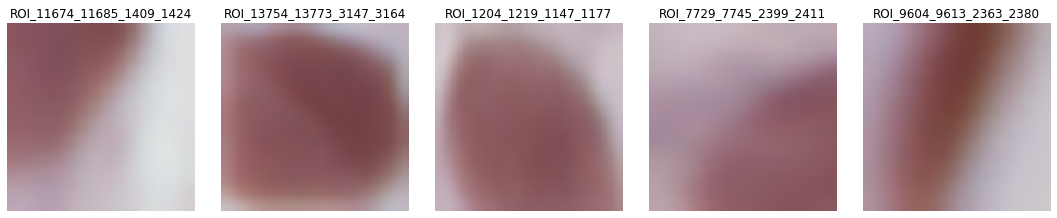

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
Number of devices: 1
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv2d_4 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 batch_normalization_6 (Batc  (None, 128, 128, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 64, 64, 64)        18496     
  

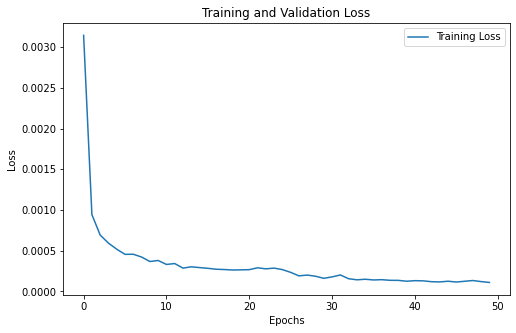

In [ ]:
import numpy as np
import cv2
from skimage.io import imread
from skimage.measure import label, regionprops
import matplotlib.pyplot as plt
from PIL import Image

# Load the images (placeholders for actual paths)
binary_mask = imread('/home/j.maragall/Pipeline_CellMapping/R2_DAPI_cleaned_mask.tif') > 0
he_image = imread("/home/j.maragall/j.maragall/Replication2 _DAPImapping/transformed_image.tif")

def preprocess_images(he_image, binary_mask, output_size=(128, 128)):
    binary_mask = binary_mask > 0  # Ensure mask is boolean
    labeled_mask = label(binary_mask)
    regions = regionprops(labeled_mask)
    rois = {}

    for region in regions:
        minr, minc, maxr, maxc = region.bbox
        cropped_image = he_image[minr:maxr, minc:maxc]
        resized_image = cv2.resize(cropped_image, output_size, interpolation=cv2.INTER_CUBIC)
        # Use the bounding box coordinates as part of the unique identifier
        unique_id = f"ROI_{minr}_{maxr}_{minc}_{maxc}"
        rois[unique_id] = resized_image

    return rois


rois = preprocess_images(he_image, binary_mask)

# Verify the number of ROIs
print(f"Number of ROIs: {len(rois)}")

# Visualizing a set of random ROIs
num_to_display = 5
selected_keys = np.random.choice(list(rois.keys()), num_to_display, replace=False)
plt.figure(figsize=(15, 3))

for i, key in enumerate(selected_keys):
    plt.subplot(1, num_to_display, i + 1)
    plt.imshow(rois[key], cmap='gray')
    plt.title(key)
    plt.axis('off')

plt.tight_layout()
plt.show()

# Convert ROIs to numpy array for model training
rois_list = list(rois.values())
rois_np = np.array(rois_list).astype('float32') / 255.0


# Since there's no direct y labels for unsupervised learning, you're using the images themselves as targets.
# However, if you're splitting for a supervised task, ensure you have your labels array ready.
#X_train, X_test = train_test_split(rois_np, test_size=0.2, random_state=42)

import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Conv2DTranspose, Reshape, BatchNormalization
from tensorflow.keras.models import Model

strategy = tf.distribute.MirroredStrategy()

print('Number of devices: {}'.format(strategy.num_replicas_in_sync))

# Everything that creates variables should be under the strategy scope.
with strategy.scope():
    input_shape = (128, 128, 3)  # Adjust based on your ROI size

# Define the input
visible = Input(shape=input_shape)

# Encoder
conv1 = Conv2D(32, kernel_size=3, activation='relu', padding='same')(visible)
conv1 = BatchNormalization()(conv1)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
conv2 = Conv2D(64, kernel_size=3, activation='relu', padding='same')(pool1)
conv2 = BatchNormalization()(conv2)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
conv3 = Conv2D(128, kernel_size=3, activation='relu', padding='same')(pool2)
conv3 = BatchNormalization()(conv3)
pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

# Bottleneck
flattened = Flatten()(pool3)
bottleneck = Dense(128, activation='relu', name='bottleneck')(flattened)


# Decoder
dense_up = Dense(16 * 16 * 128, activation='relu')(bottleneck)
reshape = Reshape((16, 16, 128))(dense_up)
up1 = Conv2DTranspose(128, kernel_size=3, strides=(2, 2), padding='same', activation='relu')(reshape)
up1 = BatchNormalization()(up1)
up2 = Conv2DTranspose(64, kernel_size=3, strides=(2, 2), padding='same', activation='relu')(up1)
up2 = BatchNormalization()(up2)
up3 = Conv2DTranspose(32, kernel_size=3, strides=(2, 2), padding='same', activation='relu')(up2)
up3 = BatchNormalization()(up3)

# Output layer
output = Conv2D(3, kernel_size=3, activation='sigmoid', padding='same')(up3)

# Create the model
autoencoder_model = Model(inputs=visible, outputs=output)

# Compile the model
autoencoder_model.compile(optimizer='adam', loss='mse')

# Model Summary
autoencoder_model.summary()

# Assuming X_train and X_test are ready
#autoencoder.fit(X_train, X_train, epochs=10, batch_size=32, validation_data=(X_test, X_test))

# Training the autoencoder model
#history = autoencoder_model.fit(X_train, X_train, epochs=50, batch_size=32, validation_data=(X_test, X_test))

# Training the model on all data
history = autoencoder_model.fit(rois_np, rois_np, epochs=50, batch_size=32)

# Plotting the training and validation loss
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss')
#plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Define the encoder model to extract features
encoder_model = Model(inputs=autoencoder_model.input, outputs=autoencoder_model.get_layer('bottleneck').output)

features = encoder_model.predict(rois_np)


In [4]:
import pandas as pd

In [ ]:
# Convert extracted features into a DataFrame
df_features = pd.DataFrame(features, columns=[f'Feature_{i+1}' for i in range(features.shape[1])])
df_features.to_csv('ae_unique_extracted_features.csv', index=False)



In [41]:
print(df_features["ROI_ID"].head())

0     ROI_3_22_1162_1173
1     ROI_5_24_4557_4567
2    ROI_17_35_3564_3580
3    ROI_23_35_3678_3690
4    ROI_23_52_3753_3765
Name: ROI_ID, dtype: object


In [42]:
df_features.columns

Index(['Feature_1', 'Feature_2', 'Feature_3', 'Feature_4', 'Feature_5',
       'Feature_6', 'Feature_7', 'Feature_8', 'Feature_9', 'Feature_10',
       ...
       'Feature_120', 'Feature_121', 'Feature_122', 'Feature_123',
       'Feature_124', 'Feature_125', 'Feature_126', 'Feature_127',
       'Feature_128', 'ROI_ID'],
      dtype='object', length=129)

In [31]:
print(df_presentation_sorted['unique_id'].head())

0    ROI_10000_10015_3378_3398
1    ROI_10000_10020_2961_2980
2    ROI_10000_10022_2279_2302
3    ROI_10001_10019_2208_2226
4    ROI_10001_10033_1247_1261
Name: unique_id, dtype: object


In [56]:
import matplotlib.pyplot as plt

df_features = pd.read_csv("/home/j.maragall/Pipeline_CellMapping/ae_unique_extracted_features.csv")

In [58]:
df_features_sorted["aligned_unique_id"]

0        ROI_10000_10015_3378_3398
1        ROI_10000_10020_2961_2980
2        ROI_10000_10022_2279_2302
3        ROI_10001_10019_2208_2226
4        ROI_10001_10033_1247_1261
                   ...            
22275     ROI_9995_10008_1676_1692
22276     ROI_9995_10011_2657_2670
22277     ROI_9995_10020_2990_3005
22278     ROI_9996_10015_2636_2652
22279     ROI_9998_10016_3665_3682
Name: aligned_unique_id, Length: 22280, dtype: object

In [ ]:
import pandas as pd

# Assuming df_features is loaded correctly as shown
df_features = pd.read_csv("/home/j.maragall/Pipeline_CellMapping/ae_unique_extracted_features.csv")

# Assuming df_presentation is loaded correctly and unique_id is created as shown
df_presentation = pd.read_csv('/home/j.maragall/PRESENTATION_FEATURES.csv')
df_presentation.fillna(0, inplace=True)
df_presentation['unique_id'] = df_presentation.apply(lambda x: f"ROI_{int(x['minr'])}_{int(x['maxr'])}_{int(x['minc'])}_{int(x['maxc'])}", axis=1)
unique_ids = df_presentation['unique_id'].copy()

# Create the aligned_unique_id in df_features based on existing data (if needed)
# For example, if df_features already correctly matches the unique_id pattern and just needs renaming:
df_features['aligned_unique_id'] = df_features['ROI_ID']  # Adjust if your identifier column is named differently

# Now, sort both DataFrames by their aligned unique identifiers
df_features_sorted = df_features.sort_values(by='aligned_unique_id').reset_index(drop=True)
#df_presentation_sorted = df_features_sorted.drop('labels', axis=1)
df_presentation_sorted = df_presentation.sort_values(by='unique_id').reset_index(drop=True)
#df_presentation_sorted = df_presentation_sorted.drop('presentation_labels', axis=1)


In [ ]:
df_features_sorted["aligned_unique_id"].head

In [ ]:
df_presentation_sorted["unique_id"].head

In [68]:
features_only = df_features_sorted.drop('aligned_unique_id', axis=1)
features_only = features_only.drop('ROI_ID', axis=1)



features_only.columns

Index(['Feature_1', 'Feature_2', 'Feature_3', 'Feature_4', 'Feature_5',
       'Feature_6', 'Feature_7', 'Feature_8', 'Feature_9', 'Feature_10',
       ...
       'Feature_119', 'Feature_120', 'Feature_121', 'Feature_122',
       'Feature_123', 'Feature_124', 'Feature_125', 'Feature_126',
       'Feature_127', 'Feature_128'],
      dtype='object', length=128)

Index(['channel_0_mean', 'channel_0_std', 'channel_0_variance',
       'channel_0_entropy', 'channel_1_mean', 'channel_1_std',
       'channel_1_variance', 'channel_1_entropy', 'channel_2_mean',
       'channel_2_std',
       ...
       'channel_43_min_intensity', 'channel_43_sum_intensity', 'centroid_x',
       'centroid_y', 'orientation', 'minr', 'minc', 'maxr', 'maxc',
       'unique_id'],
      dtype='object', length=627)

In [ ]:
import tiffslide as openslide
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from skimage.io import imsave
import cv2
import imageio
from tifffile import imread
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from umap import UMAP
import matplotlib.pyplot as plt

In [ ]:
# Separate features for scaling
features_only = df_features_sorted.drop('aligned_unique_id', axis=1)
features_only = features_only.drop('ROI_ID', axis=1)

# Initialize and fit UMAP
umap_model = UMAP(n_neighbors=7, min_dist=0, n_components=2, random_state=42, metric="canberra")
deep_embedding = umap_model.fit_transform(features_only)

# Define the unique identifier of the ROI you want to highlight
# This should be an index from the list(rois.keys()), for example, the first ROI
roi_to_highlight_id = list(rois.keys())[0]  # Change 0 to the index of the ROI you are interested in
highlight_index = list(rois.keys()).index(roi_to_highlight_id)

# Plot UMAP embeddings
plt.figure(figsize=(10, 8))

# Plot all ROIs with a lower opacity
plt.scatter(deep_embedding[:, 0], deep_embedding[:, 1], alpha=0.2, label='Other ROIs')

# Highlight the specific ROI
plt.scatter(deep_embedding[highlight_index, 0], deep_embedding[highlight_index, 1], color='red', label=f'Highlighted ROI: {roi_to_highlight_id}')

# Annotate the highlighted ROI with its unique identifier
plt.text(deep_embedding[highlight_index, 0], deep_embedding[highlight_index, 1], f' {roi_to_highlight_id}', color='black', ha='right', va='bottom')

plt.title('UMAP projection of the extracted features with a highlighted ROI')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.legend()

plt.show()


In [ ]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import matplotlib.pyplot as plt

# Assume 'deep_embedding' is your UMAP embeddings array
# Apply Agglomerative Clustering to the UMAP embeddings
agg_clustering = AgglomerativeClustering(n_clusters=4)  # adjust the number of clusters as needed
labels = agg_clustering.fit_predict(deep_embedding)

# Calculate cluster centroids for annotation purposes
centroids = np.array([deep_embedding[labels == i].mean(axis=0) for i in range(4)])

# Define the unique identifier of the ROI you want to highlight
roi_to_highlight_id = list(rois.keys())[0]  # Example: the first ROI
highlight_index = list(rois.keys()).index(roi_to_highlight_id)

# Plot UMAP embeddings with clustering results
plt.figure(figsize=(10, 8))

# Plot all ROIs colored by their cluster labels
plt.scatter(deep_embedding[:, 0], deep_embedding[:, 1], c=labels, cmap='viridis', alpha=0.5, label='Clusters')

# Highlight the specific ROI
plt.scatter(deep_embedding[highlight_index, 0], deep_embedding[highlight_index, 1], color='red', s=100, edgecolor='black', label=f'Highlighted ROI: {roi_to_highlight_id}')

# Annotate the highlighted ROI with its unique identifier
plt.text(deep_embedding[highlight_index, 0], deep_embedding[highlight_index, 1], f' {roi_to_highlight_id}', color='black', ha='right', va='bottom')

# Optionally, annotate centroids of clusters
for i, centroid in enumerate(centroids):
    plt.text(centroid[0], centroid[1], f'Cluster {i}', color='white', ha='center', va='center', fontsize=8, bbox=dict(facecolor='black', alpha=0.5))

plt.title('UMAP projection of the extracted features with Agglomerative Clustering')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.legend()

plt.show()


In [8]:
df_features.shape

(22280, 129)

In [13]:
df_features.to_csv('ae_unique_extracted_features.csv', index=False)

In [161]:
df_features.shape

(22280, 128)

In [44]:
pip install python-louvain

Defaulting to user installation because normal site-packages is not writeable
  Using cached python-louvain-0.16.tar.gz (204 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for python-louvain: filename=python_louvain-0.16-py3-none-any.whl size=9408 sha256=17508fb83e905547377a34a5ddc2bf5c794b606aa7c3d63912527dcb32ac251f
  Stored in directory: /home/j.maragall/.cache/pip/wheels/4d/7c/b6/79b198e4ec43f915fbdf967953d48b89a18893b12aa9df0ae2
Successfully built python-louvain
Note: you may need to restart the kernel to use updated packages.


/scratch/local/26211101/ipykernel_722598/3530625331.py:14: DeprecationWarning: 

The scipy.sparse array containers will be used instead of matrices
in Networkx 3.0. Use `from_scipy_sparse_array` instead.
  G = nx.from_scipy_sparse_matrix(knn_graph)


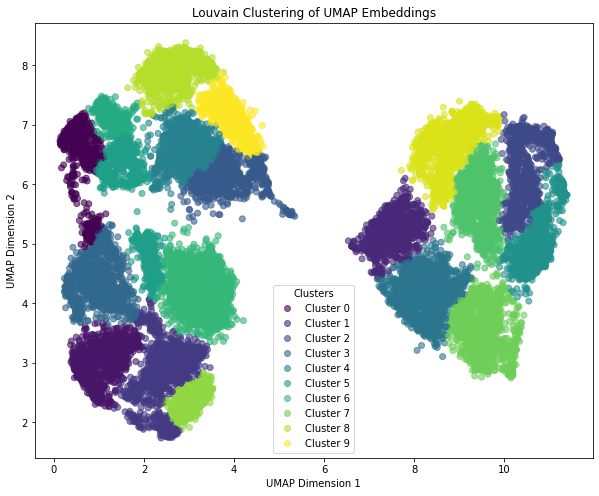

In [105]:
import numpy as np
from sklearn.neighbors import kneighbors_graph
import community as community_louvain
import networkx as nx

# Assuming 'deep_embedding' is your data matrix from the UMAP reduction

# Step 1: Create a k-NN graph
# Choose k, the number of nearest neighbors. The choice of k depends on your dataset. sqrt(n) is my k choice.
k = 134
knn_graph = kneighbors_graph(deep_embedding, k, include_self=False, mode='distance')

# Convert the k-NN graph to a NetworkX graph for Louvain
G = nx.from_scipy_sparse_matrix(knn_graph)

# Step 2: Apply Louvain clustering
# The function returns a dictionary where keys are node indices and values are the partition numbers (cluster labels)
partition = community_louvain.best_partition(G)

# Convert partition dictionary to a list of labels
deep_labels_louvain = np.array(list(partition.values()))

# Now you have 'deep_labels_louvain' as your cluster labels, you can proceed with your analysis

import matplotlib.pyplot as plt

# Assuming 'deep_embedding' is your data reduced to 2 dimensions with UMAP
# and 'deep_labels_louvain' are the labels obtained from Louvain clustering

plt.figure(figsize=(10, 8))
scatter = plt.scatter(deep_embedding[:, 0], deep_embedding[:, 1], c=deep_labels_louvain, cmap='viridis', alpha=0.6)

# Creating a legend
# We'll create a custom legend to show the cluster numbers
# First, find the number of unique clusters
unique_labels = np.unique(deep_labels_louvain)
# Then, create a list of legend entries
legend1 = plt.legend(handles=scatter.legend_elements()[0], 
                     labels=['Cluster {}'.format(i) for i in unique_labels],
                     title="Clusters")

plt.title('Louvain Clustering of UMAP Embeddings')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.show()



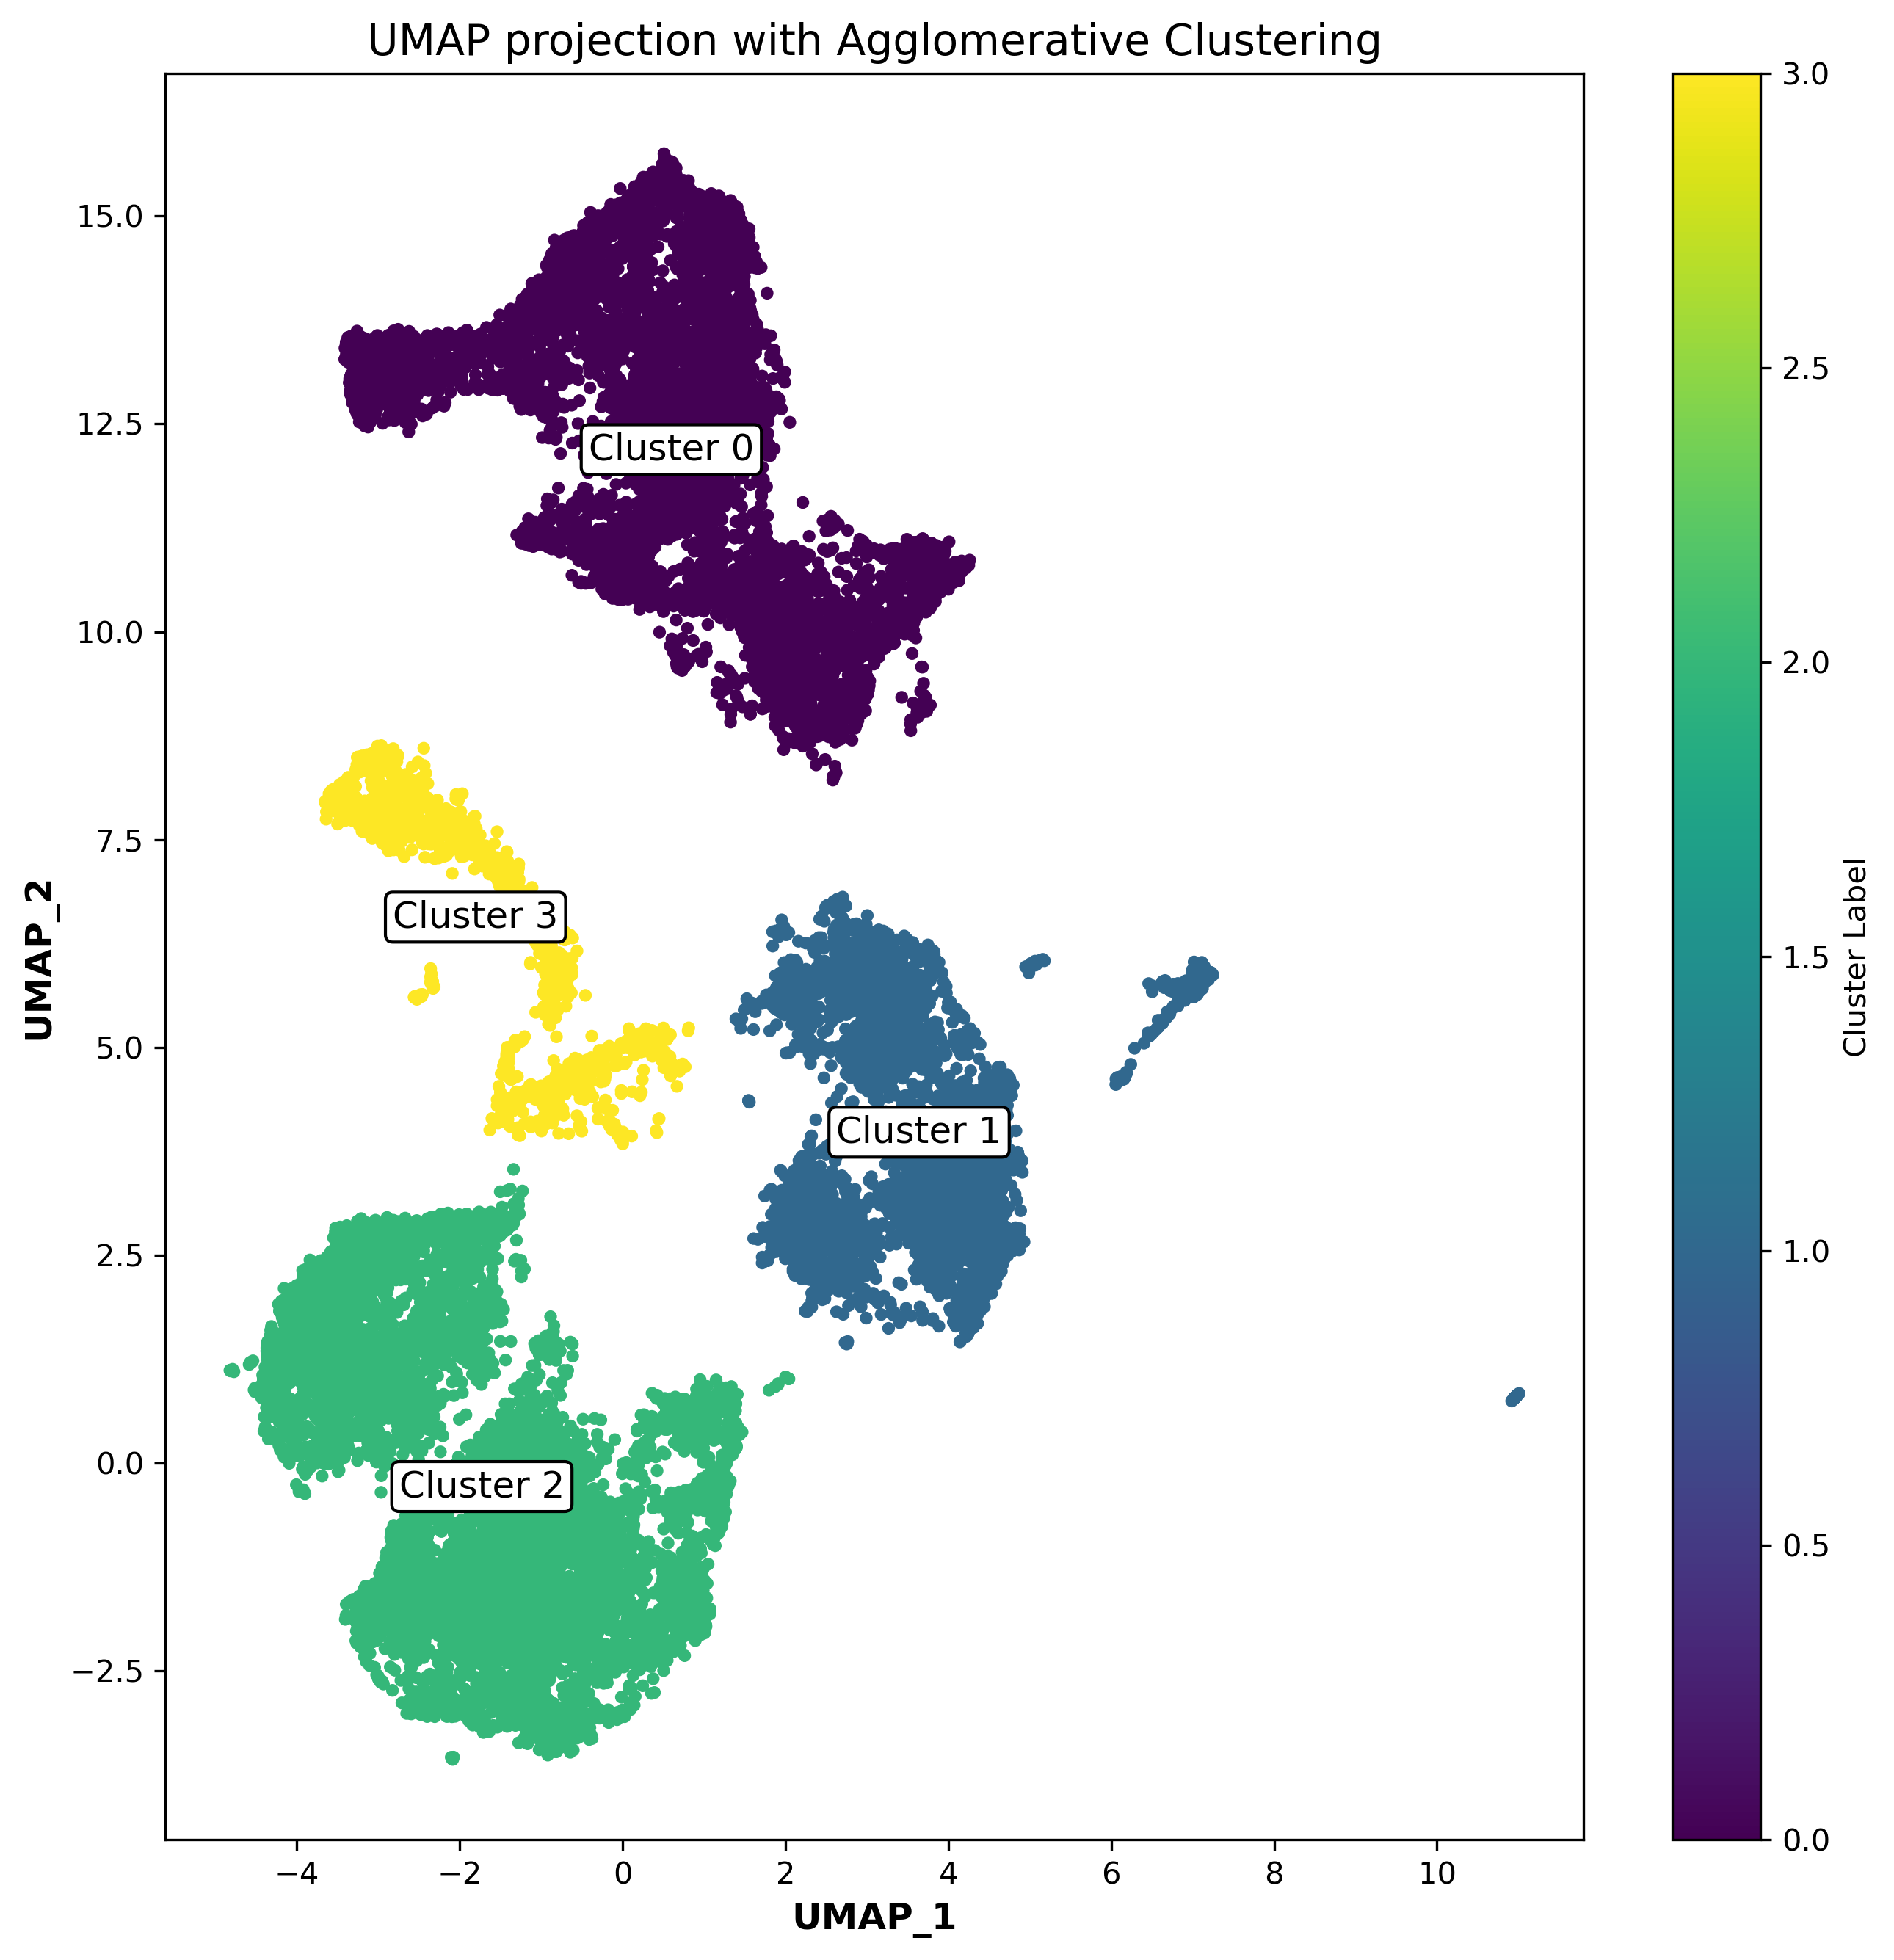

IndexError: index 0 is out of bounds for axis 0 with size 0

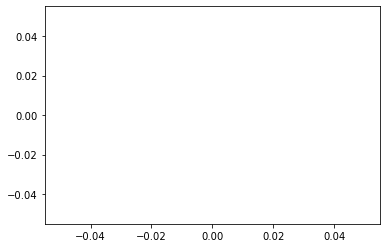

In [21]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming 'embedding' is your UMAP embeddings array from the previous UMAP steps
# And assuming 'embedding_df' is the DataFrame that includes the UMAP embeddings and the unique identifiers

# Apply the AgglomerativeClustering algorithm to the UMAP embeddings
agg_clustering = AgglomerativeClustering(n_clusters=4)  # adjust the number of clusters as needed
deep_labels = agg_clustering.fit_predict(embedding)  # Replace 'embedding' with your UMAP embeddings variable

# Integrate cluster labels into the DataFrame
embedding_df['Cluster'] = deep_labels

# Calculate cluster centroids
centroids = np.array([embedding[embedding_df['Cluster'] == i].mean(axis=0) for i in range(4)])

# Plot the results with different colors for each cluster
plt.figure(figsize=(9, 9), dpi=300)  # Adjust figure size and DPI for high resolution
plt.scatter(embedding_df['UMAP_1'], embedding_df['UMAP_2'], c=embedding_df['Cluster'], cmap='viridis', s=10)  # Adjusted marker size for visibility

# Annotate the clusters
for i, centroid in enumerate(centroids):
    plt.text(centroid[0], centroid[1], f"Cluster {i}", fontsize=12,  # Adjusted for visual balance
             ha='center', va='center',
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.2'))

plt.xlabel('UMAP_1', fontsize=12, fontweight="bold")
plt.ylabel('UMAP_2', fontsize=12, fontweight="bold")
plt.title('UMAP projection with Agglomerative Clustering', fontsize=14)
plt.colorbar(label='Cluster Label')
plt.tight_layout()

plt.show()

# To visualize a specific nucleus with its unique identifier and cluster label
highlight_roi = 'your_unique_identifier_here'  # Replace with a specific unique identifier
highlighted = embedding_df[embedding_df['unique_id'] == highlight_roi]
plt.scatter(highlighted['UMAP_1'], highlighted['UMAP_2'], color='red', s=50)
plt.text(highlighted['UMAP_1'].values[0], highlighted['UMAP_2'].values[0], f"{highlight_roi}, Cluster: {highlighted['Cluster'].values[0]}", color='black', fontsize=9)


In [25]:
import tiffslide as openslide
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from skimage.io import imsave
import cv2
import imageio
from tifffile import imread
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from umap import UMAP
import matplotlib.pyplot as plt

In [18]:
number_of_objects

0

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from umap import UMAP
import matplotlib.pyplot as plt

# Impute all NaN values with 0
df_presentation_sorted.fillna(0, inplace=True)

# Create a unique identifier based on bounding box coordinates
df_presentation_sorted['unique_id'] = df_presentation_sorted.apply(lambda x: f"ROI_{int(x['minr'])}_{int(x['maxr'])}_{int(x['minc'])}_{int(x['maxc'])}", axis=1)

# Save the unique_id column for later use before dropping it
unique_ids = df_presentation_sorted['unique_id'].copy()

# Drop the 'unique_id' column before dimensionality reduction
df_presentation_numeric = df_presentation_sorted.drop(['unique_id'], axis=1)

umap_model = UMAP(n_neighbors=7, min_dist=0, n_components=2, random_state=42, metric="canberra")
embedding = umap_model.fit_transform(df_presentation_numeric)

# Convert embedding to a DataFrame for easier plotting
embedding_df = pd.DataFrame(embedding, columns=['UMAP_1', 'UMAP_2'])
embedding_df['unique_id'] = unique_ids

# Choose a specific ROI to highlight
highlight_roi = unique_ids.iloc[0]  # Assuming the first unique_id for demonstration

plt.figure(figsize=(10, 8))

# Plot all ROIs with a lower opacity, without specifying a color for the majority
plt.scatter(embedding[:, 0], embedding[:, 1], alpha=0.2, label='Other ROIs')

# Highlight the specific ROI with color='red'
plt.scatter(embedding[highlight_index, 0], embedding[highlight_index, 1], color='red', label=f'Highlighted ROI: {highlight_roi}')

# Annotate the highlighted ROI with its unique identifier, as you specified
plt.text(embedding[highlight_index, 0], embedding[highlight_index, 1], f' {highlight_roi}', color='black', ha='right', va='bottom')

plt.title('UMAP projection of the extracted features with a highlighted ROI')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.legend()

plt.show()

In [84]:
df_presentation_sorted.columns

Index(['channel_0_mean', 'channel_0_std', 'channel_0_variance',
       'channel_0_entropy', 'channel_1_mean', 'channel_1_std',
       'channel_1_variance', 'channel_1_entropy', 'channel_2_mean',
       'channel_2_std',
       ...
       'channel_43_min_intensity', 'channel_43_sum_intensity', 'centroid_x',
       'centroid_y', 'orientation', 'minr', 'minc', 'maxr', 'maxc',
       'unique_id'],
      dtype='object', length=627)

In [87]:
df_features_sorted.columns

Index(['Feature_1', 'Feature_2', 'Feature_3', 'Feature_4', 'Feature_5',
       'Feature_6', 'Feature_7', 'Feature_8', 'Feature_9', 'Feature_10',
       ...
       'Feature_121', 'Feature_122', 'Feature_123', 'Feature_124',
       'Feature_125', 'Feature_126', 'Feature_127', 'Feature_128', 'ROI_ID',
       'aligned_unique_id'],
      dtype='object', length=130)

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from umap import UMAP
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import AgglomerativeClustering

# Assuming df_presentation_sorted is already loaded and processed
# unique_ids assignment and dropping 'unique_id' before UMAP transformation
# is already correctly done

presentation_features_only = df_presentation_sorted.drop('unique_id', axis=1)

# Perform UMAP dimensionality reduction
umap_model = UMAP(n_neighbors=7, min_dist=0.07, n_components=2, random_state=42, metric="canberra")
embedding = umap_model.fit_transform(presentation_features_only)

# Convert embedding to a DataFrame for easier plotting
embedding_df = pd.DataFrame(embedding, columns=['UMAP_1', 'UMAP_2'])
embedding_df['unique_id'] = unique_ids.tolist()

# Choose a specific ROI to highlight and determine its index in 'unique_ids'
highlight_roi = unique_ids.iloc[0]  # or any specific unique_id
highlight_index = unique_ids[unique_ids == highlight_roi].index[0]

# Agglomerative Clustering on UMAP embeddings
agg_clustering = AgglomerativeClustering(n_clusters=4)
presentation_labels = agg_clustering.fit_predict(embedding)

# Calculate cluster centroids
centroids = np.array([embedding[presentation_labels == i].mean(axis=0) for i in range(4)])

# Plotting
plt.figure(figsize=(10, 8))
plt.scatter(embedding[:, 0], embedding[:, 1], c=presentation_labels, cmap='viridis', alpha=0.5, label='Clusters')
plt.scatter(embedding[highlight_index, 0], embedding[highlight_index, 1], color='red', s=100, edgecolor='black', label=f'Highlighted ROI: {highlight_roi}')
plt.text(embedding[highlight_index, 0], embedding[highlight_index, 1], f' {highlight_roi}', color='black', ha='right', va='bottom')
for i, centroid in enumerate(centroids):
    plt.text(centroid[0], centroid[1], f'Cluster {i}', color='white', ha='center', va='center', fontsize=8, bbox=dict(facecolor='black', alpha=0.5))
plt.title('UMAP projection with Agglomerative Clustering')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.legend()
plt.show()

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from umap import UMAP
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

# Assuming 'df_features' and 'df_presentation' are already loaded with 'unique_id' and 'aligned_unique_id' properly set

# Sort both DataFrames by their unique identifiers
df_features_sorted = df_features.sort_values(by='aligned_unique_id').reset_index(drop=True)
df_presentation_sorted = df_presentation.sort_values(by='unique_id').reset_index(drop=True)

# Ensure features only in datasets and apply UMAP
features_only_features = df_features_sorted.drop(['aligned_unique_id', 'ROI_ID'], axis=1)
features_only_presentation = df_presentation_sorted.drop(['unique_id'], axis=1).fillna(0)

umap_model_features = UMAP(n_neighbors=7, min_dist=0, n_components=2, random_state=42, metric="canberra")
umap_model_presentation = UMAP(n_neighbors=7, min_dist=0.07, n_components=2, random_state=42, metric="canberra")

deep_embedding_features = umap_model_features.fit_transform(features_only_features)
deep_embedding_presentation = umap_model_presentation.fit_transform(features_only_presentation)

# Apply Agglomerative Clustering to the UMAP embeddings
agg_clustering_features = AgglomerativeClustering(n_clusters=4)
agg_clustering_presentation = AgglomerativeClustering(n_clusters=4)

labels_features = agg_clustering_features.fit_predict(deep_embedding_features)
labels_presentation = agg_clustering_presentation.fit_predict(deep_embedding_presentation)

# Prepare DataFrames for comparison
df_features_sorted['labels'] = labels_features
df_presentation_sorted['presentation_labels'] = labels_presentation

# Ensure the DataFrames are aligned by 'unique_id' and 'aligned_unique_id' for comparison
# Here we assume that 'unique_id' in df_presentation_sorted corresponds to 'aligned_unique_id' in df_features_sorted
merged_df = pd.merge(df_features_sorted[['aligned_unique_id', 'labels']], df_presentation_sorted[['unique_id', 'presentation_labels']], left_on='aligned_unique_id', right_on='unique_id')

# Calculate ARI and NMI scores with the aligned and sorted data
ari_score = adjusted_rand_score(merged_df['labels'], merged_df['presentation_labels'])
nmi_score = normalized_mutual_info_score(merged_df['labels'], merged_df['presentation_labels'], average_method='arithmetic')

print(f"Adjusted Rand Index (ARI) score: {ari_score}")
print(f"Normalized Mutual Information (NMI) score: {nmi_score}")


In [85]:
# Example: Manual inspection of alignment for a subset
subset_ids = df_features_sorted['aligned_unique_id'].sample(n=16666, random_state=42).tolist()
df_features_sub = df_features_sorted[df_features_sorted['aligned_unique_id'].isin(subset_ids)]
df_presentation_sub = df_presentation_sorted[df_presentation_sorted['unique_id'].isin(subset_ids)]

print(df_features_sub[['aligned_unique_id', 'labels']])
print(df_presentation_sub[['unique_id', 'presentation_labels']])


from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

# Ensure the DataFrames are aligned by 'unique_id' and 'aligned_unique_id' for comparison
merged_df = pd.merge(df_features_sorted, df_presentation_sorted, left_on='aligned_unique_id', right_on='unique_id', how='inner')

df_features_sub_sorted = df_features_sub.sort_values(by='aligned_unique_id').reset_index(drop=True)
df_presentation_sub_sorted = df_presentation_sub.sort_values(by='unique_id').reset_index(drop=True)

# Assuming the subsets are now aligned, directly use their labels for scoring
ari_score_sub = adjusted_rand_score(df_features_sub_sorted['labels'], df_presentation_sub_sorted['presentation_labels'])
nmi_score_sub = normalized_mutual_info_score(df_features_sub_sorted['labels'], df_presentation_sub_sorted['presentation_labels'], average_method='arithmetic')

print(f"Subset Adjusted Rand Index (ARI) score: {ari_score_sub}")
print(f"Subset Normalized Mutual Information (NMI) score: {nmi_score_sub}")

               aligned_unique_id  labels
0      ROI_10000_10015_3378_3398       1
1      ROI_10000_10020_2961_2980       1
2      ROI_10000_10022_2279_2302       1
3      ROI_10001_10019_2208_2226       1
4      ROI_10001_10033_1247_1261       2
...                          ...     ...
22272   ROI_9991_10011_1031_1052       1
22274   ROI_9994_10017_3188_3211       0
22275   ROI_9995_10008_1676_1692       0
22276   ROI_9995_10011_2657_2670       0
22278   ROI_9996_10015_2636_2652       3

[16666 rows x 2 columns]
                       unique_id  presentation_labels
0      ROI_10000_10015_3378_3398                    0
1      ROI_10000_10020_2961_2980                    3
2      ROI_10000_10022_2279_2302                    2
3      ROI_10001_10019_2208_2226                    2
4      ROI_10001_10033_1247_1261                    1
...                          ...                  ...
22272   ROI_9991_10011_1031_1052                    0
22274   ROI_9994_10017_3188_3211                  

In [115]:
ari_score_sub = adjusted_rand_score(labels, labels_presentation)
nmi_score_sub = normalized_mutual_info_score(labels,labels_presentation)

print(f"Subset Adjusted Rand Index (ARI) score: {ari_score_sub}")
print(f"Subset Normalized Mutual Information (NMI) score: {nmi_score_sub}")


Subset Adjusted Rand Index (ARI) score: 0.012116396415257271
Subset Normalized Mutual Information (NMI) score: 0.009152972889785914


In [58]:
merged_df.columns

Index(['Feature_1', 'Feature_2', 'Feature_3', 'Feature_4', 'Feature_5',
       'Feature_6', 'Feature_7', 'Feature_8', 'Feature_9', 'Feature_10',
       ...
       'channel_43_sum_intensity', 'centroid_x', 'centroid_y', 'orientation',
       'minr', 'minc', 'maxr', 'maxc', 'unique_id', 'presentation_labels'],
      dtype='object', length=759)

In [69]:
# Example dictionaries to map unique identifiers to labels
labels_dict = dict(zip(ids_deep, labels))
presentation_labels_dict = dict(zip(ids_presentation, presentation_labels))


NameError: name 'ids_deep' is not defined

In [78]:
df_presentation_sorted["presentation_labels"]

0        0
1        3
2        2
3        2
4        1
        ..
22275    0
22276    0
22277    0
22278    0
22279    1
Name: presentation_labels, Length: 22280, dtype: int64

In [79]:
df_features_sorted["labels"]

0        1
1        1
2        1
3        1
4        2
        ..
22275    0
22276    0
22277    3
22278    3
22279    1
Name: labels, Length: 22280, dtype: int64

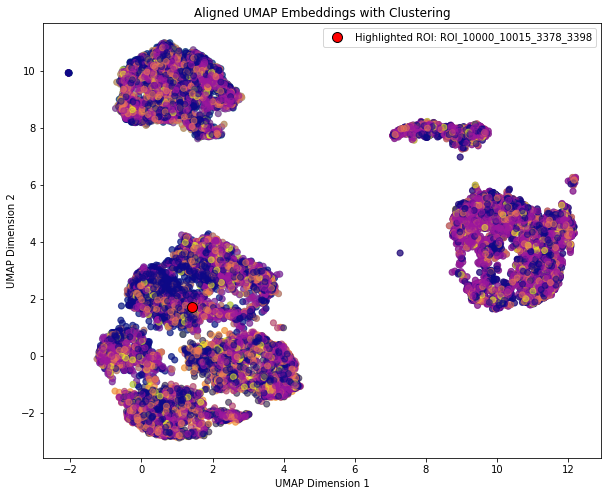

In [117]:
# Visualization assuming 'deep_embedding' corresponds to embeddings from 'merged_df'
plt.figure(figsize=(10, 8))

# Scatter plot for UMAP embeddings
plt.scatter(deep_embedding[:, 0], deep_embedding[:, 1], 
            c=labels,  # Use aligned labels for coloring 
            cmap='viridis', alpha=0.5)


# Scatter plot for UMAP embeddings
plt.scatter(deep_embedding[:, 0], deep_embedding[:, 1], 
            c=presentation_labels,  # Use aligned labels for coloring 
            cmap='plasma', alpha=0.5)

# Highlight specific ROI
highlight_index = merged_df[merged_df['unique_id'] == highlight_roi].index[0]
plt.scatter(deep_embedding[highlight_index, 0], deep_embedding[highlight_index, 1], 
            color='red', s=100, edgecolor='black', 
            label=f'Highlighted ROI: {highlight_roi}')

plt.title('Aligned UMAP Embeddings with Clustering')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.legend()
plt.show()


In [50]:
# Visualization assuming 'deep_embedding' corresponds to embeddings from 'merged_df'
plt.figure(figsize=(10, 8))

# Scatter plot for UMAP embeddings
plt.scatter(deep_embedding[:, 0], deep_embedding[:, 1], 
            c=presentation_labels,  # Use aligned labels for coloring 
            cmap='viridis', alpha=0.5)

# Highlight specific ROI
highlight_index = merged_df[merged_df['unique_id'] == highlight_roi].index[0]
plt.scatter(deep_embedding[highlight_index, 0], deep_embedding[highlight_index, 1], 
            color='red', s=100, edgecolor='black', 
            label=f'Highlighted ROI: {highlight_roi}')

plt.title('Aligned UMAP Embeddings with Clustering')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.legend()
plt.show()


Adjusted Rand Index (ARI) score: 0.012116396415257271
Normalized Mutual Information (NMI) score: 0.009152972889785914


In [31]:
df_features_sub

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,...,Feature_122,Feature_123,Feature_124,Feature_125,Feature_126,Feature_127,Feature_128,ROI_ID,aligned_unique_id,labels
5575,143.383000,170.376310,0.000000,64.82353,195.903880,79.555360,53.534820,22.850601,67.223150,104.32454,...,113.487840,160.043610,65.326260,133.688800,99.786480,111.774510,240.436080,ROI_14694_14707_3906_3917,ROI_14694_14707_3906_3917,2
6405,123.429520,69.752640,0.000000,129.74614,171.103490,83.117300,5.168518,6.623470,58.649082,0.00000,...,29.474634,85.040070,107.787994,105.088360,99.585360,157.860820,41.001514,ROI_15534_15551_4669_4684,ROI_15534_15551_4669_4684,1
8161,89.450455,141.226470,7.594472,88.39847,48.006880,101.011345,29.807170,51.768750,75.025790,0.00000,...,49.107456,108.546830,70.709130,74.599960,82.301990,104.719740,0.000000,ROI_2170_2189_3702_3720,ROI_2170_2189_3702_3720,2
10432,101.347015,80.653090,0.000000,145.43048,188.117570,97.343110,85.377950,29.691168,69.242320,0.00000,...,30.540825,89.683975,78.267624,27.091736,72.758510,98.911080,147.540850,ROI_3436_3456_797_819,ROI_3436_3456_797_819,1
14171,70.230385,50.491043,20.994669,111.21896,85.776184,77.432350,63.509660,50.055850,126.079124,0.00000,...,77.866875,141.245510,92.243250,88.227040,33.162426,97.470505,0.000000,ROI_5461_5481_2887_2902,ROI_5461_5481_2887_2902,2
15803,104.557106,115.355610,33.116020,68.15605,75.699110,112.231720,17.914007,54.744140,23.880259,0.00000,...,74.306350,73.876570,79.655900,145.911940,78.481865,110.638540,0.000000,ROI_6275_6287_3050_3066,ROI_6275_6287_3050_3066,3
16200,64.069570,83.675800,0.000000,0.00000,38.728610,49.168427,53.089110,17.189865,35.280758,0.00000,...,92.314514,156.349980,85.939950,97.234436,86.349210,40.624184,0.000000,ROI_6509_6524_2725_2737,ROI_6509_6524_2725_2737,2
17767,59.678730,80.454490,0.000000,99.54832,147.966750,59.441370,31.434574,6.343427,9.387531,0.00000,...,10.552849,141.823210,106.281290,85.202500,82.075554,54.474060,19.378063,ROI_7329_7348_2576_2596,ROI_7329_7348_2576_2596,0
20866,42.736073,128.268980,0.000000,80.03745,49.513435,80.540370,43.825832,26.689163,0.000000,0.00000,...,30.204397,121.131836,88.215900,95.658220,92.089930,133.292880,0.000000,ROI_9151_9176_3309_3323,ROI_9151_9176_3309_3323,0
21599,89.464905,73.380750,0.000000,107.44608,41.196968,43.480984,50.282710,10.266591,20.979267,0.00000,...,20.675392,105.574196,41.468777,98.235900,41.812200,80.302930,0.000000,ROI_959_978_3338_3360,ROI_959_978_3338_3360,1


In [30]:
df_presentation_sub

,channel_0_mean,channel_0_std,channel_0_variance,channel_0_entropy,channel_1_mean,channel_1_std,channel_1_variance,channel_1_entropy,channel_2_mean,channel_2_std,...,channel_43_sum_intensity,centroid_x,centroid_y,orientation,minr,minc,maxr,maxc,unique_id,presentation_labels
5575,137.260000,36.572290,1337.53230,4.068092,0.0,0.0,0.0,0.0,1.100000,0.387298,...,34.0,14701.35000,3910.37000,0.481983,14694.0,3906.0,14707.0,3917.0,ROI_14694_14707_3906_3917,1
6405,124.417990,40.612766,1649.39670,4.586219,0.0,0.0,0.0,0.0,1.851852,1.711851,...,55.0,15541.67800,4675.70360,0.446105,15534.0,4669.0,15551.0,4684.0,ROI_15534_15551_4669_4684,1
8161,189.639680,29.485119,869.37220,3.880851,0.0,0.0,0.0,0.0,2.263158,2.709927,...,143.0,2179.11740,3709.71660,0.440678,2170.0,3702.0,2189.0,3720.0,ROI_2170_2189_3702_3720,1
10432,184.833330,55.379616,3066.90160,4.378133,0.0,0.0,0.0,0.0,3.362179,1.187642,...,175.0,3445.27560,808.27563,0.854139,3436.0,797.0,3456.0,819.0,ROI_3436_3456_797_819,3
14171,171.879300,43.545390,1896.20090,3.977082,0.0,0.0,0.0,0.0,3.064655,1.383446,...,111.0,5471.12500,2894.03880,0.243264,5461.0,2887.0,5481.0,2902.0,ROI_5461_5481_2887_2902,0
15803,149.664230,53.104260,2820.06250,4.248114,0.0,0.0,0.0,0.0,0.919708,0.951820,...,33.0,6280.13870,3057.83940,-1.507145,6275.0,3050.0,6287.0,3066.0,ROI_6275_6287_3050_3066,1
16200,180.619050,29.765142,885.96375,3.691055,0.0,0.0,0.0,0.0,2.306122,1.079255,...,62.0,6515.96600,2730.65300,-0.045652,6509.0,2725.0,6524.0,2737.0,ROI_6509_6524_2725_2737,0
17767,122.793236,37.855762,1433.05870,4.459738,0.0,0.0,0.0,0.0,2.533835,0.841131,...,66.0,7338.09770,2585.52250,0.962038,7329.0,2576.0,7348.0,2596.0,ROI_7329_7348_2576_2596,1
20866,80.291336,18.131023,328.73400,4.111574,0.0,0.0,0.0,0.0,3.480315,1.470714,...,112.0,9163.55500,3315.72830,-0.188509,9151.0,3309.0,9176.0,3323.0,ROI_9151_9176_3309_3323,1
21599,215.929260,20.961643,439.39050,3.039751,0.0,0.0,0.0,0.0,4.684887,9.871053,...,135.0,968.06433,3348.24440,0.990668,959.0,3338.0,978.0,3360.0,ROI_959_978_3338_3360,0


In [27]:
print(df_features_sub[['aligned_unique_id', 'labels']])
print(df_presentation_sub[['unique_id', 'presentation_labels']])

               aligned_unique_id  labels
5575   ROI_14694_14707_3906_3917       2
6405   ROI_15534_15551_4669_4684       1
8161     ROI_2170_2189_3702_3720       2
10432      ROI_3436_3456_797_819       1
14171    ROI_5461_5481_2887_2902       2
15803    ROI_6275_6287_3050_3066       3
16200    ROI_6509_6524_2725_2737       2
17767    ROI_7329_7348_2576_2596       0
20866    ROI_9151_9176_3309_3323       0
21599      ROI_959_978_3338_3360       1
                       unique_id  presentation_labels
5575   ROI_14694_14707_3906_3917                    1
6405   ROI_15534_15551_4669_4684                    1
8161     ROI_2170_2189_3702_3720                    1
10432      ROI_3436_3456_797_819                    3
14171    ROI_5461_5481_2887_2902                    0
15803    ROI_6275_6287_3050_3066                    1
16200    ROI_6509_6524_2725_2737                    0
17767    ROI_7329_7348_2576_2596                    1
20866    ROI_9151_9176_3309_3323                    1
21599    

In [24]:
merged_df.head

<bound method NDFrame.head of                aligned_unique_id  labels                  unique_id  \
0      ROI_10000_10015_3378_3398       1  ROI_10000_10015_3378_3398   
1      ROI_10000_10020_2961_2980       1  ROI_10000_10020_2961_2980   
2      ROI_10000_10022_2279_2302       1  ROI_10000_10022_2279_2302   
3      ROI_10001_10019_2208_2226       1  ROI_10001_10019_2208_2226   
4      ROI_10001_10033_1247_1261       2  ROI_10001_10033_1247_1261   
...                          ...     ...                        ...   
22275   ROI_9995_10008_1676_1692       0   ROI_9995_10008_1676_1692   
22276   ROI_9995_10011_2657_2670       0   ROI_9995_10011_2657_2670   
22277   ROI_9995_10020_2990_3005       3   ROI_9995_10020_2990_3005   
22278   ROI_9996_10015_2636_2652       3   ROI_9996_10015_2636_2652   
22279   ROI_9998_10016_3665_3682       1   ROI_9998_10016_3665_3682   

       presentation_labels  
0                        0  
1                        3  
2                        2  
3

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from umap import UMAP
import matplotlib.pyplot as plt


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

# Assuming 'deep_embedding' is your UMAP embeddings array
# 'deep_labels' obtained from clustering deep learning features
# 'labels' obtained from clustering UMAP-reduced presentation features

# Overlay the clustering results
plt.figure(figsize=(12, 6))

# Plot for deep learning feature clustering (Now correctly on the left)
plt.subplot(1, 2, 1)
plt.scatter(deep_embedding[:, 0], deep_embedding[:, 1], c=labels, cmap='plasma', s=10)
plt.title('Deep Learning Features Clustering (n=9)')
plt.colorbar(label='Cluster Label')

# Plot for presentation feature clustering (Now correctly on the right)
plt.subplot(1, 2, 2)
plt.scatter(deep_embedding[:, 0], deep_embedding[:, 1], c=labels_presentation, cmap='viridis', s=10)
plt.title('Presentation Cluster Labels (n=9) on Deep Learning UMAP space')
plt.colorbar(label='Cluster Label')

plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

# Assuming 'deep_embedding' is your UMAP embeddings array
# 'deep_labels' obtained from clustering deep learning features
# 'labels' obtained from clustering UMAP-reduced presentation features

# Overlay the clustering results
plt.figure(figsize=(12, 6))

# Plot for deep learning feature clustering (Now correctly on the left)
plt.subplot(1, 2, 1)
plt.scatter(embedding[:, 0], embedding[:, 1], c=labels_presentation, cmap='plasma', s=10)
plt.title('Deep Learning Features Clustering (n=9)')
plt.colorbar(label='Cluster Label')

# Plot for presentation feature clustering (Now correctly on the right)
plt.subplot(1, 2, 2)
plt.scatter(embedding[:, 0], embedding[:, 1], c=labels, cmap='viridis', s=10)
plt.title('Presentation Cluster Labels (n=9) on Deep Learning UMAP space')
plt.colorbar(label='Cluster Label')

plt.tight_layout()
plt.show()

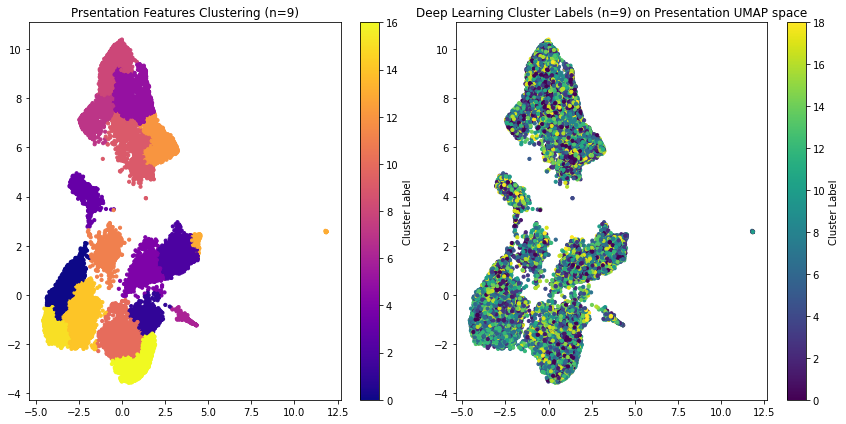

In [109]:
import matplotlib.pyplot as plt
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

# Assuming 'deep_embedding' is your UMAP embeddings array
# 'deep_labels' obtained from clustering deep learning features
# 'labels' obtained from clustering UMAP-reduced presentation features

# Overlay the clustering results
plt.figure(figsize=(12, 6))

# Plot for deep learning feature clustering (Now correctly on the left)
plt.subplot(1, 2, 1)
plt.scatter(embedding[:, 0], embedding[:, 1], c=labels_louvain, cmap='plasma', s=10)
plt.title('Prsentation Features Clustering (n=9)')
plt.colorbar(label='Cluster Label')

# Plot for presentation feature clustering (Now correctly on the right)
plt.subplot(1, 2, 2)
plt.scatter(embedding[:, 0], embedding[:, 1], c=deep_labels_louvain, cmap='viridis', s=10)
plt.title('Deep Learning Cluster Labels (n=9) on Presentation UMAP space')
plt.colorbar(label='Cluster Label')

plt.tight_layout()
plt.show()

In [94]:
ari_score = adjusted_rand_score(presentation_labels, labels)
nmi_score = normalized_mutual_info_score(presentation_labels, labels, average_method='arithmetic')

print(ari_score)
print(nmi_score)

0.012116396415257271
0.009152972889785914


In [5]:
import pandas as pd
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

# Assuming 'unique_ids' from the first block of code is in the same order as 'labels'
df1 = pd.DataFrame({'unique_id': list(rois.keys()), 'labels': labels})

# 'embedding_df' from the second block already has 'unique_id' and the embeddings, add 'labels'
embedding_df['presentation_labels'] = presentation_labels

# Merge the two DataFrames on 'unique_id' to align the cluster labels
merged_df = pd.merge(df1, embedding_df[['unique_id', 'presentation_labels']], on='unique_id')

# Calculate ARI and NMI scores
ari_score = adjusted_rand_score(merged_df['labels'], merged_df['presentation_labels'])
nmi_score = normalized_mutual_info_score(merged_df['labels'], merged_df['presentation_labels'], average_method='arithmetic')

print(f"Adjusted Rand Index (ARI) score: {ari_score}")
print(f"Normalized Mutual Information (NMI) score: {nmi_score}")


NameError: name 'rois' is not defined

In [93]:
# Calculate the Adjusted Rand Index (ARI)
ari_score = adjusted_rand_score(labels, presentation_labels)

# Calculate the Normalized Mutual Information (NMI)
nmi_score = normalized_mutual_info_score(labels, presentation_labels)

# Output the scores
print(f"Adjusted Rand Index (ARI): {ari_score:.4f}")
print(f"Normalized Mutual Information (NMI): {nmi_score:.4f}")


Adjusted Rand Index (ARI): 0.0121
Normalized Mutual Information (NMI): 0.0092


In [98]:
df_features_sorted.columns

Index(['Feature_1', 'Feature_2', 'Feature_3', 'Feature_4', 'Feature_5',
       'Feature_6', 'Feature_7', 'Feature_8', 'Feature_9', 'Feature_10',
       ...
       'Feature_121', 'Feature_122', 'Feature_123', 'Feature_124',
       'Feature_125', 'Feature_126', 'Feature_127', 'Feature_128', 'ROI_ID',
       'aligned_unique_id'],
      dtype='object', length=130)

In [100]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from umap import UMAP
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt


assert df_features_sorted['aligned_unique_id'].equals(df_presentation_sorted['unique_id']), "Unique IDs do not match."

# Step 2: UMAP Dimensionality Reduction and Clustering
# For df_features
features_scaled = MinMaxScaler().fit_transform(df_features_sorted.drop('unique_id', axis=1))
umap_features = UMAP(n_neighbors=7, min_dist=0.07, n_components=2, random_state=42).fit_transform(features_scaled)
labels_features = AgglomerativeClustering(n_clusters=4).fit_predict(umap_features)

# For df_presentation
presentation_scaled = MinMaxScaler().fit_transform(df_presentation.drop('unique_id', axis=1))
umap_presentation = UMAP(n_neighbors=7, min_dist=0.07, n_components=2, random_state=42).fit_transform(presentation_scaled)
labels_presentation = AgglomerativeClustering(n_clusters=4).fit_predict(umap_presentation)

# Step 3: Overlay and Compare Clustering Results
plt.figure(figsize=(12, 6))

# Plotting deep learning feature clustering
plt.subplot(1, 2, 1)
plt.scatter(umap_features[:, 0], umap_features[:, 1], c=labels_features, cmap='plasma', s=10)
plt.title('Deep Learning Features Clustering')
plt.colorbar(label='Cluster Label')

# Plotting presentation feature clustering
plt.subplot(1, 2, 2)
plt.scatter(umap_presentation[:, 0], umap_presentation[:, 1], c=labels_presentation, cmap='viridis', s=10)
plt.title('Presentation Features Clustering')
plt.colorbar(label='Cluster Label')

plt.tight_layout()
plt.show()

# This ensures both datasets' clustering labels are accurately applied based on their unique identifiers, allowing for direct comparison and verification of alignment.


KeyError: "['unique_id'] not found in axis"

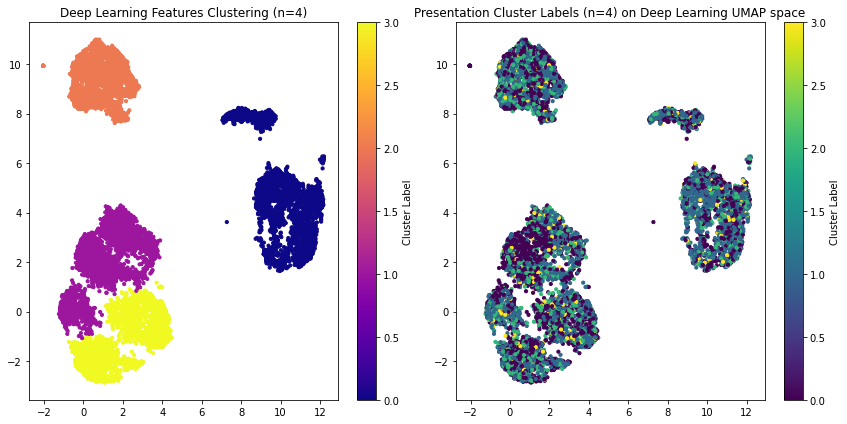

In [33]:
import matplotlib.pyplot as plt
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

# Assuming 'deep_embedding' is your UMAP embeddings array
# 'deep_labels' obtained from clustering deep learning features
# 'labels' obtained from clustering UMAP-reduced presentation features

# Overlay the clustering results
plt.figure(figsize=(12, 6))

# Plot for deep learning feature clustering (Now correctly on the left)
plt.subplot(1, 2, 1)
plt.scatter(deep_embedding[:, 0], deep_embedding[:, 1], c=labels, cmap='plasma', s=10)
plt.title('Deep Learning Features Clustering (n=4)')
plt.colorbar(label='Cluster Label')

# Plot for presentation feature clustering (Now correctly on the right)
plt.subplot(1, 2, 2)
plt.scatter(deep_embedding[:, 0], deep_embedding[:, 1], c=presentation_labels, cmap='viridis', s=10)
plt.title('Presentation Cluster Labels (n=4) on Deep Learning UMAP space')
plt.colorbar(label='Cluster Label')

plt.tight_layout()
plt.show()

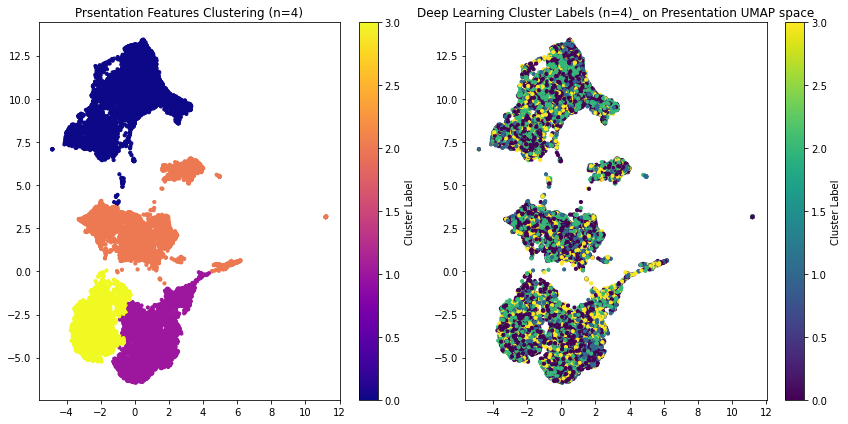

In [191]:
import matplotlib.pyplot as plt
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

# Assuming 'deep_embedding' is your UMAP embeddings array
# 'deep_labels' obtained from clustering deep learning features
# 'labels' obtained from clustering UMAP-reduced presentation features

# Overlay the clustering results
plt.figure(figsize=(12, 6))

# Plot for deep learning feature clustering (Now correctly on the left)
plt.subplot(1, 2, 1)
plt.scatter(embedding[:, 0], embedding[:, 1], c=labels, cmap='plasma', s=10)
plt.title('Prsentation Features Clustering (n=4)')
plt.colorbar(label='Cluster Label')

# Plot for presentation feature clustering (Now correctly on the right)
plt.subplot(1, 2, 2)
plt.scatter(embedding[:, 0], embedding[:, 1], c=deep_labels, cmap='viridis', s=10)
plt.title('Deep Learning Cluster Labels (n=4)_ on Presentation UMAP space')
plt.colorbar(label='Cluster Label')

plt.tight_layout()
plt.show()

In [41]:
print(umap_embedding.shape)
print(labels.shape)
print(deep_labels.shape)


(17824, 2)
(22280,)
(17824,)


In [45]:
import matplotlib.pyplot as plt

# Assuming you have a way to retrieve or reference ROI images from both methods
# For Method 1, let's say `rois` list contains the cropped images directly.
# For Method 2, you would need a similar list or a way to access the images based on extracted features.

def visualize_nuclei_pairs(traditional_rois, deep_learning_rois, indices):
    """
    Visualizes pairs of nuclei images from traditional and deep learning feature extraction methods.
    
    Parameters:
    - traditional_rois: List of ROI images from traditional method
    - deep_learning_rois: List of ROI images from deep learning method
    - indices: List of indices indicating which nuclei to compare
    """
    
    num_pairs = len(indices)
    plt.figure(figsize=(4*num_pairs, 4))
    
    for i, idx in enumerate(indices):
        # Traditional method ROI
        plt.subplot(2, num_pairs, i + 1)
        plt.imshow(traditional_rois[idx], cmap='gray')
        plt.title(f'Traditional #{idx}')
        plt.axis('off')
        
        # Deep learning method ROI
        plt.subplot(2, num_pairs, num_pairs + i + 1)
        plt.imshow(deep_learning_rois[idx], cmap='gray')
        plt.title(f'Deep Learning #{idx}')
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Assuming `rois_traditional` and `rois_deep_learning` are lists of ROI images from your methods
# And assuming `matched_indices` contains the indices of matched nuclei to visualize
matched_indices = [0, 1, 2]  # Example indices - adjust according to your data
visualize_nuclei_pairs(rois_traditional, rois_deep_learning, matched_indices)


NameError: name 'rois_traditional' is not defined

In [46]:
import numpy as np

# Assuming 'rois' is a list of ROIs and 'rois_np' is their numpy representation
print(f"Initial number of ROIs: {len(rois)}")

# After converting ROIs to a numpy array
print(f"Shape of ROIs numpy array: {rois_np.shape}")

# After train-test split
print(f"Number of ROIs in training set: {X_train.shape[0]}")
print(f"Number of ROIs in testing set: {X_test.shape[0]}")

# After feature extraction
features = encoder_model.predict(X_train)
print(f"Number of feature rows extracted: {features.shape[0]}")

# Compare the expected number of features with the actual number
expected_features = X_train.shape[0]  # Assuming one feature vector per ROI
actual_features = features.shape[0]
print(f"Expected number of feature rows: {expected_features}")
print(f"Actual number of feature rows: {actual_features}")

if expected_features == actual_features:
    print("Feature extraction aligns with the number of input ROIs.")
else:
    print("Discrepancy detected in the feature extraction process.")

# Additional check for the full dataset if necessary
total_features = encoder_model.predict(np.concatenate([X_train, X_test], axis=0))
print(f"Total number of feature rows for the full dataset: {total_features.shape[0]}")
print(f"Expected total number of ROIs: {rois_np.shape[0]}")


Initial number of ROIs: 22280
Shape of ROIs numpy array: (22280, 128, 128, 3)
Number of ROIs in training set: 17824
Number of ROIs in testing set: 4456
Number of feature rows extracted: 17824
Expected number of feature rows: 17824
Actual number of feature rows: 17824
Feature extraction aligns with the number of input ROIs.
Total number of feature rows for the full dataset: 22280
Expected total number of ROIs: 22280


In [47]:
import tensorflow as tf

# Assuming 'autoencoder_model' is the model you've trained
model_save_path = 'autoencoder_model_saved'

# Save the model using tf.saved_model.save
tf.saved_model.save(autoencoder_model, model_save_path)

# Output the path for reference
print(f"Model saved to: {model_save_path}")


2024-03-19 10:57:08.164765: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: autoencoder_model_saved/assets
Model saved to: autoencoder_model_saved
